In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score

In [3]:
pd.options.display.max_rows = 100

# Reading and Understanding Data

In [11]:
#Reading the data file using pandas
LEADS = pd.read_csv('Leads.csv')
LEADS.head(25)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [12]:
LEADS.shape

(9240, 37)

In [13]:
LEADS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [14]:
LEADS.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [15]:
LEADS.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [16]:
#check for duplicates
sum(LEADS.duplicated(subset = 'Prospect ID')) == 0

True

In [17]:
#check for duplicates
sum(LEADS.duplicated(subset = 'Lead Number')) == 0

True

In [18]:
LEADS.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [19]:
LEADS.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

# Data Cleaning

In [20]:
#Prospect ID and Lead Number both serve the same purpose.Both are unique identifiers so dropping Prospect ID.
LEADS.drop('Prospect ID', axis = 1, inplace = True)

In [21]:
# Replacing all 'select' values with NaN
LEADS = LEADS.replace('select', np.nan)
LEADS = LEADS.replace('Select', np.nan)

In [22]:
LEADS.isnull().mean()*100

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [23]:
percentage_null=LEADS.isnull().mean()*100
percentage_null_40=percentage_null[percentage_null>=40]

In [24]:
percentage_null_40.index

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [25]:
drop1=['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

In [26]:
len(drop1)

7

In [27]:
LEADS.drop(drop1 , axis=1, inplace=True)

In [28]:
LEADS.shape

(9240, 29)

In [29]:
LEADS.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

##### 'Country'

In [30]:
LEADS['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

###### The distribution of the data is very heavily skewed.As we can see the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped

In [31]:
LEADS.drop('Country', axis = 1, inplace = True)

##### 'City'

In [32]:
LEADS['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [33]:
LEADS['City'] = LEADS['City'].replace(np.nan,'Mumbai')

In [34]:
LEADS['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

##### 'Specialization'

In [35]:
LEADS['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [36]:
LEADS['Specialization'] = LEADS['Specialization'].replace(np.nan, 'Others')

In [37]:
LEADS['Specialization'].value_counts(dropna=False)

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

##### 'What is your current occupation'

In [38]:
LEADS['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [39]:
LEADS.rename(columns={'What is your current occupation': 'Occupation'}, inplace=True)

In [40]:
LEADS['Occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

In [41]:
LEADS['Occupation']=LEADS['Occupation'].replace(np.nan, 'Unemployed')

In [42]:
LEADS['Occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

##### 'What matters most to you in choosing a course'

In [43]:
LEADS['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

###### The distribution of the data is very heavily skewed.As we can see the Number of Values are quite high, this column can be dropped

In [44]:
LEADS.drop('What matters most to you in choosing a course', axis = 1, inplace = True)

##### 'Tags'

In [45]:
LEADS['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [46]:
LEADS['Tags'] = LEADS['Tags'].replace(np.nan,'Not Specified')

In [47]:
LEADS['Tags'].value_counts(normalize=True)*100

Not Specified                                        36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

In [48]:
LEADS['Tags'].value_counts(dropna=False)

Not Specified                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

##### 'Lead Source'

In [49]:
LEADS['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [50]:
LEADS['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [51]:
LEADS['Lead Source'] = LEADS['Lead Source'].replace(np.nan,'Others')

In [52]:
LEADS['Lead Source'] = LEADS['Lead Source'].replace('google','Google')

In [53]:
LEADS['Lead Source'].value_counts(dropna=False)

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
Others                 36
bing                    6
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

##### 'Last Activity'

In [54]:
LEADS['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [55]:
LEADS['Last Activity'] = LEADS['Last Activity'].replace(np.nan,'Others')

In [56]:
LEADS['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Others                           103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [57]:
LEADS.isnull().mean()*100

Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.000000
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               0.000000
Specialization                              0.000000
Occupation                                  0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.

###### Delete every row that contains a Nan value. As there are fewer than 2% of Dropped rows, the model will remain unaffected.

In [58]:
LEADS = LEADS.dropna()

In [59]:
LEADS.isnull().mean()*100

Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
Occupation                                  0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

# Data Imbalance

In [60]:
LEADS.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [61]:
LIST=['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']
for i in LIST:
    print(i)
    print(LEADS[i].nunique())
    print('\n')

Lead Number
9103


Lead Origin
4


Lead Source
21


Do Not Email
2


Do Not Call
2


Converted
2


TotalVisits
41


Total Time Spent on Website
1717


Page Views Per Visit
114


Last Activity
17


Specialization
19


Occupation
6


Search
2


Magazine
1


Newspaper Article
2


X Education Forums
2


Newspaper
2


Digital Advertisement
2


Through Recommendations
2


Receive More Updates About Our Courses
1


Tags
27


Update me on Supply Chain Content
1


Get updates on DM Content
1


City
6


I agree to pay the amount through cheque
1


A free copy of Mastering The Interview
2


Last Notable Activity
16




In [62]:
LIST1=['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
      'I agree to pay the amount through cheque']

In [63]:
LIST2=['Do Not Email','Do Not Call', 'Converted','Search','Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview']
for i in LIST2:
    x = (LEADS[i].value_counts(normalize = True)) * 100
    print(x)
    print('\n')

No     92.046578
Yes     7.953422
Name: Do Not Email, dtype: float64


No     99.978029
Yes     0.021971
Name: Do Not Call, dtype: float64


0    61.979567
1    38.020433
Name: Converted, dtype: float64


No     99.846205
Yes     0.153795
Name: Search, dtype: float64


No     99.978029
Yes     0.021971
Name: Newspaper Article, dtype: float64


No     99.989015
Yes     0.010985
Name: X Education Forums, dtype: float64


No     99.989015
Yes     0.010985
Name: Newspaper, dtype: float64


No     99.956058
Yes     0.043942
Name: Digital Advertisement, dtype: float64


No     99.923102
Yes     0.076898
Name: Through Recommendations, dtype: float64


No     68.274195
Yes    31.725805
Name: A free copy of Mastering The Interview, dtype: float64




In [64]:
LIST3=['Do Not Call','Search','Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations']
LIST1.extend(LIST3)

In [65]:
LIST1

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations']

In [66]:
LEADS.drop(LIST1, axis = 1, inplace = True)

In [67]:
# checking the conversion rate
conversion = (sum(LEADS['Converted'])/len(LEADS['Converted'].index))*100
conversion

38.02043282434362

In [68]:
LEADS.head(15)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Others,Unemployed,Ringing,Mumbai,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,No,Modified
5,660680,API,Olark Chat,No,0,0.0,0,0.00,Olark Chat Conversation,Others,Unemployed,Not Specified,Mumbai,No,Modified
6,660673,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,Will revert after reading the email,Mumbai,No,Modified
7,660664,API,Olark Chat,No,0,0.0,0,0.00,Olark Chat Conversation,Others,Unemployed,Not Specified,Mumbai,No,Modified
8,660624,Landing Page Submission,Direct Traffic,No,0,2.0,71,2.00,Email Opened,IT Projects Management,Unemployed,Not Specified,Thane & Outskirts,Yes,Email Opened
9,660616,API,Google,No,0,4.0,58,4.00,Email Opened,Finance Management,Unemployed,Not Specified,Mumbai,No,Email Opened


In [69]:
LEADS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9103 non-null   int64  
 1   Lead Origin                             9103 non-null   object 
 2   Lead Source                             9103 non-null   object 
 3   Do Not Email                            9103 non-null   object 
 4   Converted                               9103 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9103 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9103 non-null   object 
 9   Specialization                          9103 non-null   object 
 10  Occupation                              9103 non-null   obje

# Outliers

In [70]:
LEADS.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,617027.742612,0.380204,3.445238,481.350104,2.362820
std,23337.138926,0.485464,4.854853,545.066142,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596408.000000,0.000000,1.000000,9.000000,1.000000
50%,615278.000000,0.000000,3.000000,244.000000,2.000000
75%,637166.000000,1.000000,5.000000,919.500000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


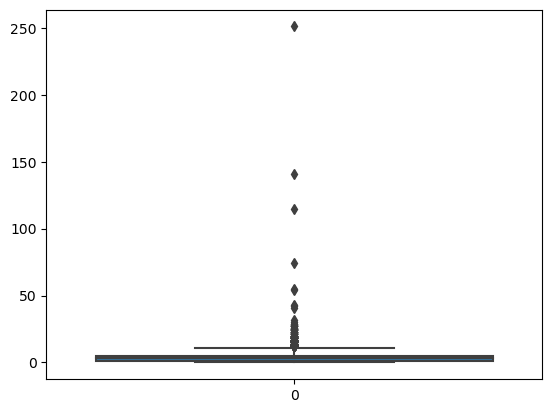

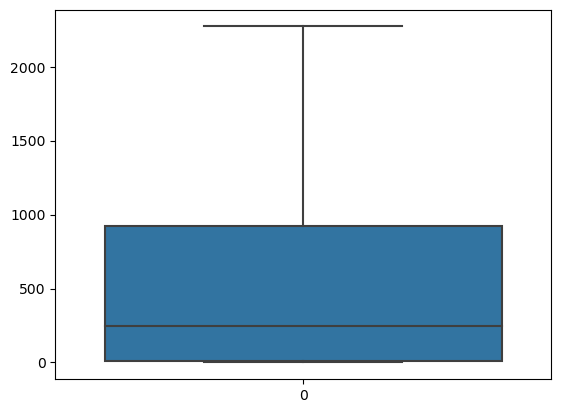

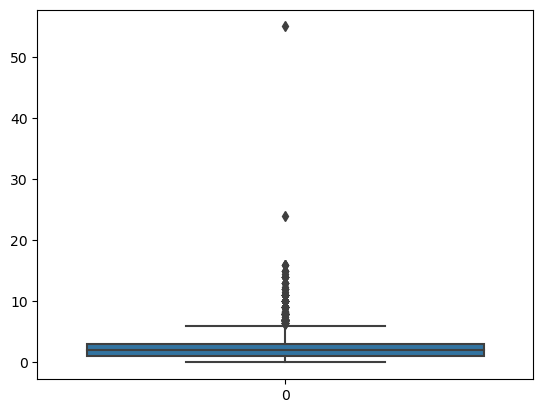

In [71]:
LIST=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for i in LIST:
    sns.boxplot(LEADS[i])
    plt.show()

In [72]:
LIST=['TotalVisits','Page Views Per Visit']
for i in LIST:
    print(i)
    x=LEADS[i].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])
    print(x)
    print('\n')

TotalVisits
count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64


Page Views Per Visit
count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64




In [73]:
LIST=['TotalVisits','Page Views Per Visit']
for i in LIST:
    #q1 & q3
    q1= LEADS[i].quantile(0.01)
    q3= LEADS[i].quantile(0.99)
    LEADS[i]=np.where(LEADS[i]>q3,q3,LEADS[i])
    LEADS[i]=np.where(LEADS[i]<q1,q1,LEADS[i])

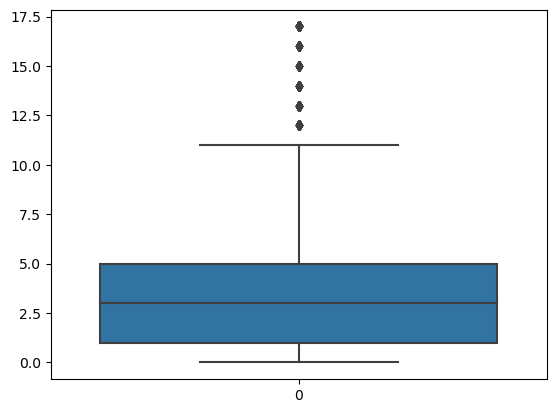

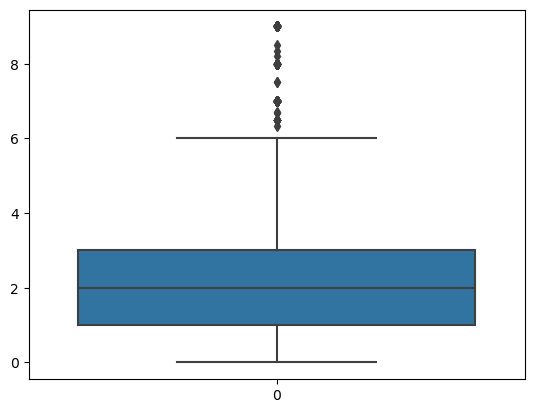

In [74]:
LIST=['TotalVisits','Page Views Per Visit']
for i in LIST:
    sns.boxplot(LEADS[i])
    plt.show()

# Exploratory Data Analysis

In [75]:
LEADS.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [76]:
LEADS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9103 non-null   int64  
 1   Lead Origin                             9103 non-null   object 
 2   Lead Source                             9103 non-null   object 
 3   Do Not Email                            9103 non-null   object 
 4   Converted                               9103 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9103 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9103 non-null   object 
 9   Specialization                          9103 non-null   object 
 10  Occupation                              9103 non-null   obje

In [77]:
LEADS.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization', 'Occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

Lead Origin
Landing Page Submission    53.674613
API                        39.305723
Lead Add Form               6.679117
Lead Import                 0.340547
Name: Lead Origin, dtype: float64


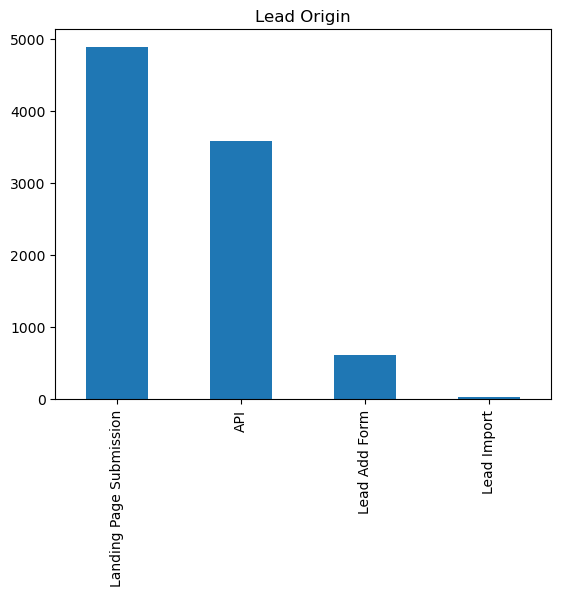

Lead Source
Google               31.561024
Direct Traffic       27.935845
Olark Chat           19.257388
Organic Search       12.677139
Reference             4.866528
Welingak Website      1.417115
Referral Sites        1.373174
Facebook              0.340547
Others                0.318576
bing                  0.065912
Click2call            0.043942
Social Media          0.021971
Live Chat             0.021971
Press_Release         0.021971
Pay per Click Ads     0.010985
blog                  0.010985
WeLearn               0.010985
welearnblog_Home      0.010985
youtubechannel        0.010985
testone               0.010985
NC_EDM                0.010985
Name: Lead Source, dtype: float64


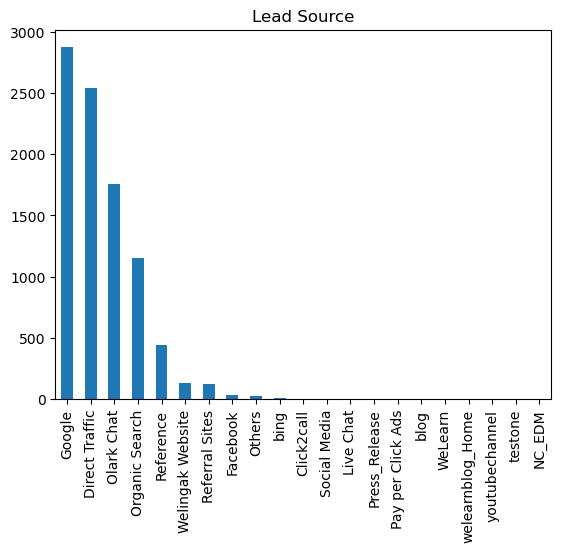

Do Not Email
No     92.046578
Yes     7.953422
Name: Do Not Email, dtype: float64


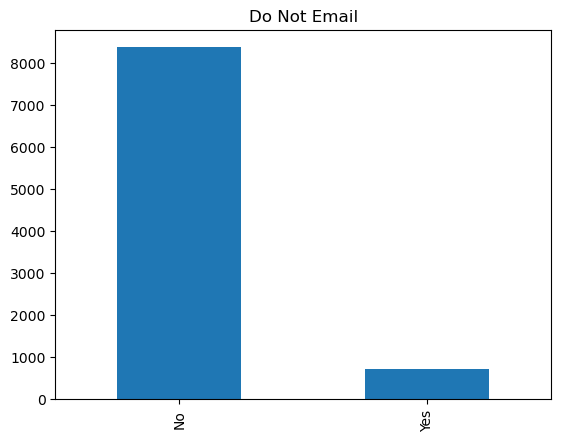

Converted
0    61.979567
1    38.020433
Name: Converted, dtype: float64


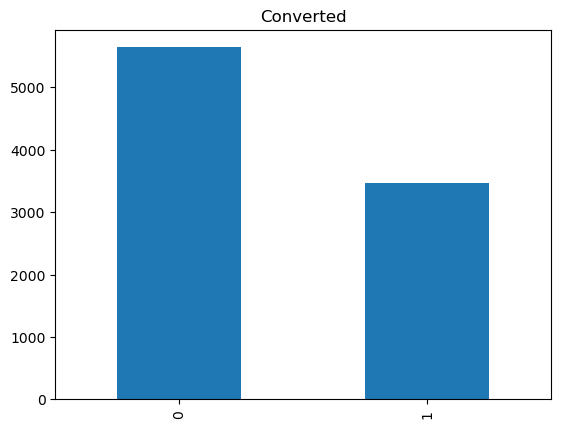

TotalVisits
0.0     24.047017
2.0     18.455454
3.0     14.346919
4.0     12.303636
5.0      8.601560
6.0      5.119191
1.0      4.339229
7.0      3.394485
8.0      2.460727
9.0      1.801604
10.0     1.252334
17.0     1.087554
11.0     0.944743
13.0     0.527299
12.0     0.494343
14.0     0.395474
16.0     0.230693
15.0     0.197737
Name: TotalVisits, dtype: float64


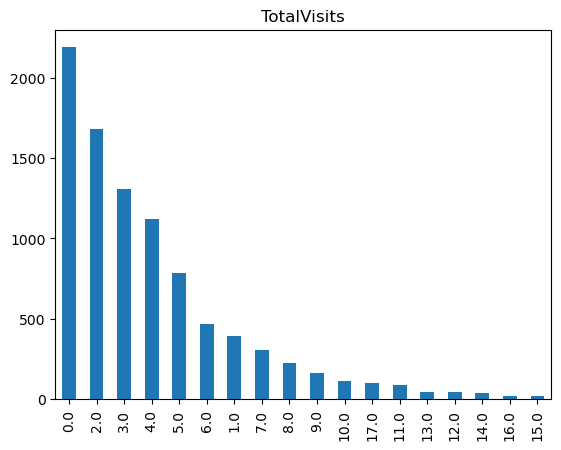

Last Activity
Email Opened                    37.756783
SMS Sent                        30.077996
Olark Chat Conversation         10.677799
Page Visited on Website          7.030649
Converted to Lead                4.701747
Email Bounced                    3.427442
Email Link Clicked               2.933099
Form Submitted on Website        1.274305
Unreachable                      0.988685
Unsubscribed                     0.670109
Had a Phone Conversation         0.274635
View in browser link Clicked     0.065912
Approached upfront               0.054927
Email Received                   0.021971
Email Marked Spam                0.021971
Visited Booth in Tradeshow       0.010985
Resubscribed to emails           0.010985
Name: Last Activity, dtype: float64


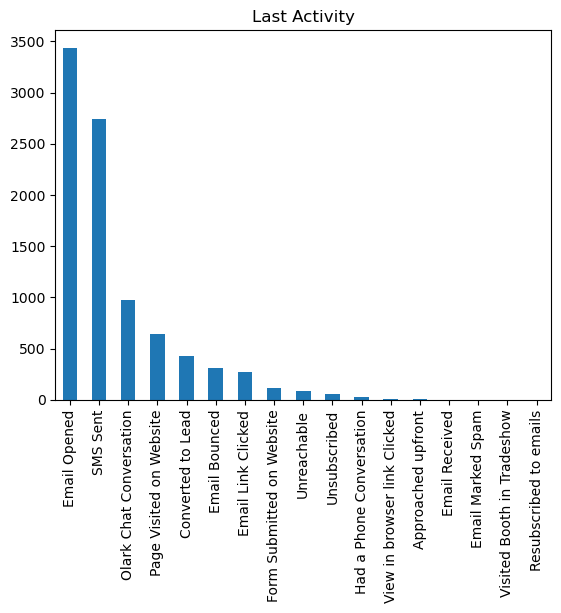

Specialization
Others                               36.295727
Finance Management                   10.567945
Human Resource Management             9.205756
Marketing Management                  9.051961
Operations Management                 5.492695
Business Administration               4.383170
IT Projects Management                4.020653
Supply Chain Management               3.800945
Banking, Investment And Insurance     3.680105
Travel and Tourism                    2.219049
Media and Advertising                 2.219049
International Business                1.933429
Healthcare Management                 1.724706
E-COMMERCE                            1.219378
Hospitality Management                1.219378
Retail Management                     1.098539
Rural and Agribusiness                0.801933
E-Business                            0.626167
Services Excellence                   0.439416
Name: Specialization, dtype: float64


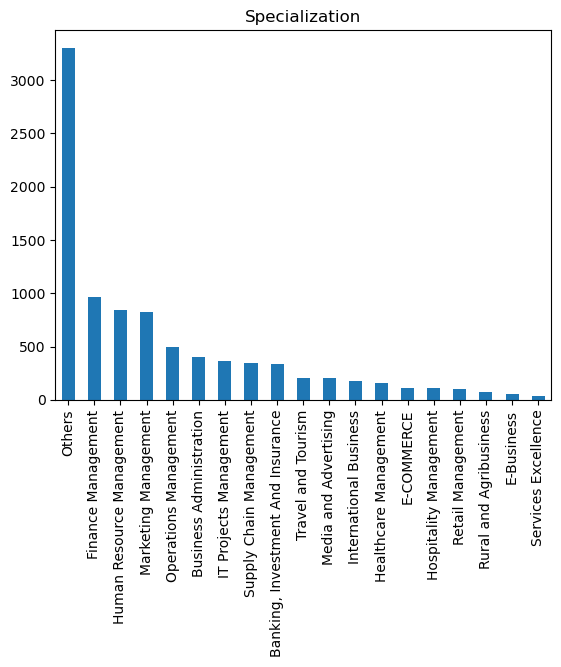

Occupation
Unemployed              89.915413
Working Professional     7.459079
Student                  2.273976
Other                    0.164781
Housewife                0.098869
Businessman              0.087883
Name: Occupation, dtype: float64


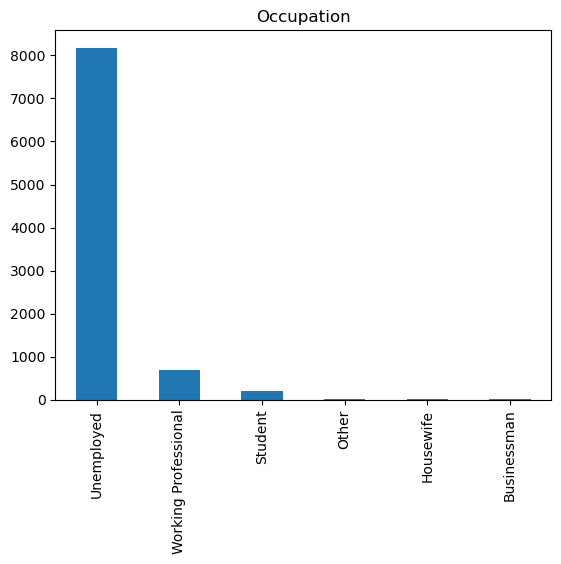

Tags
Not Specified                                        36.614303
Will revert after reading the email                  22.355267
Ringing                                              13.061628
Interested in other courses                           5.591563
Already a student                                     5.108206
Closed by Horizzon                                    3.306602
switched off                                          2.636493
Busy                                                  2.032297
Lost to EINS                                          1.900472
Not doing further education                           1.592881
Interested  in full time MBA                          1.274305
Graduation in progress                                1.219378
invalid number                                        0.911787
Diploma holder (Not Eligible)                         0.692080
wrong number given                                    0.516313
opp hangup                                        

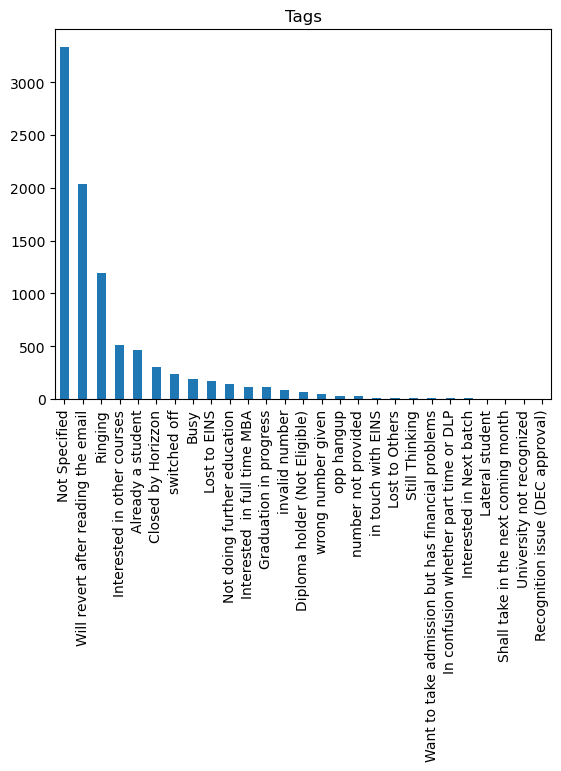

City
Mumbai                         74.469955
Thane & Outskirts               8.195101
Other Cities                    7.470065
Other Cities of Maharashtra     4.910469
Other Metro Cities              4.141492
Tier II Cities                  0.812919
Name: City, dtype: float64


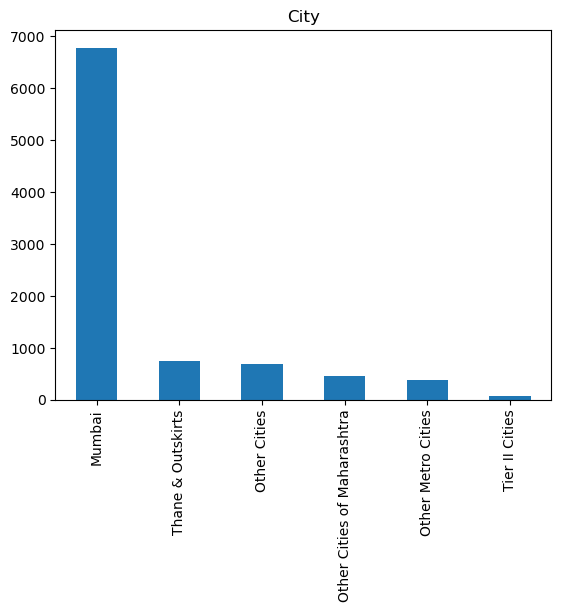

A free copy of Mastering The Interview
No     68.274195
Yes    31.725805
Name: A free copy of Mastering The Interview, dtype: float64


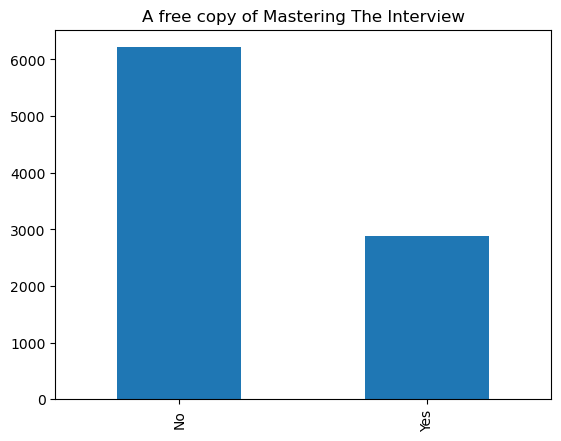

Last Notable Activity
Modified                        35.922223
Email Opened                    31.055696
SMS Sent                        23.860266
Page Visited on Website          3.493354
Olark Chat Conversation          2.010326
Email Link Clicked               1.900472
Email Bounced                    0.659123
Unsubscribed                     0.516313
Unreachable                      0.351532
Had a Phone Conversation         0.153795
Email Marked Spam                0.021971
Approached upfront               0.010985
Resubscribed to emails           0.010985
View in browser link Clicked     0.010985
Form Submitted on Website        0.010985
Email Received                   0.010985
Name: Last Notable Activity, dtype: float64


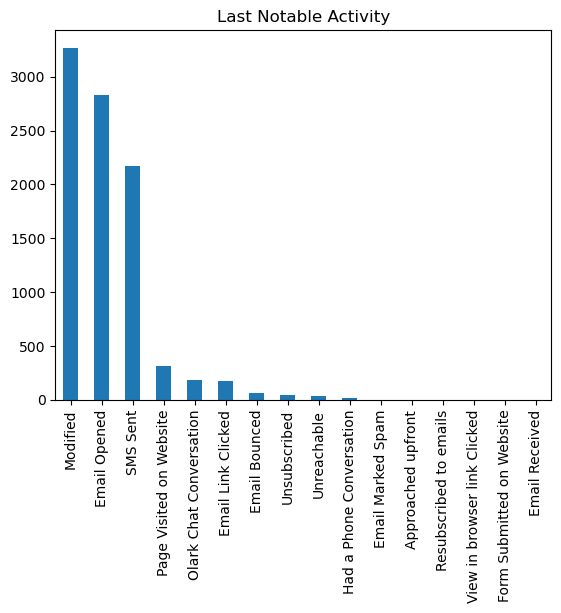

In [78]:
LIST = [ 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Last Activity', 'Specialization', 'Occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity']

for i in LIST:
    print(i)
    print(LEADS[i].value_counts(normalize=True)*100)
    LEADS[i].value_counts().plot.bar()
    plt.title(i)  # Add a title for each plot
    plt.show()    # Show each plot separately

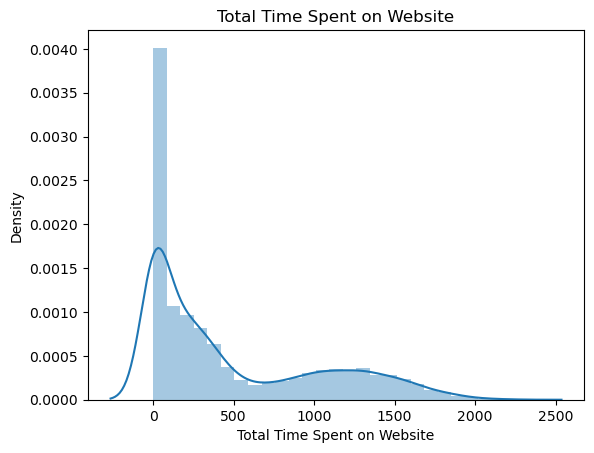

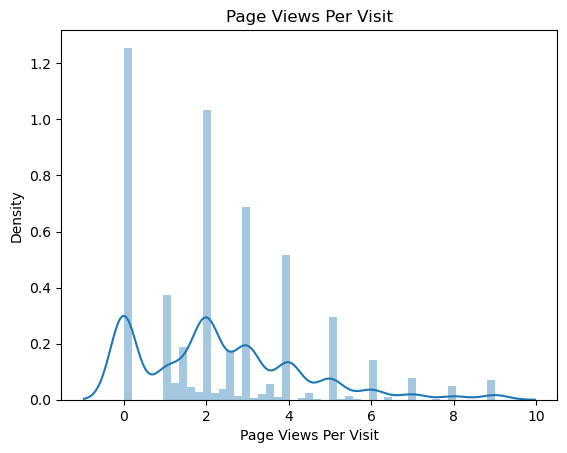

In [79]:
LIST = ['Total Time Spent on Website', 'Page Views Per Visit']

for i in LIST:
    figsize=[15, 10]
    sns.distplot(LEADS[i])
    plt.title(i)  # Add a title for each plot
    plt.show()    # Show each plot separately

# Data Preparation

In [80]:
# List of variables to map

LIST =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
LEADS[LIST] = LEADS[LIST].apply(binary_map)

In [81]:
status = pd.get_dummies(LEADS[[ 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Last Activity', 'Specialization', 'Occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity']],drop_first=True)
status.head()


,Do Not Email,Converted,TotalVisits,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [82]:
status.columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=112)

In [83]:
# Add the results to the original dataframe
col=LEADS[['Lead Number','Total Time Spent on Website','Page Views Per Visit']]
LEADS = pd.concat([col, status], axis = 1)
LEADS.head()

,Lead Number,Total Time Spent on Website,Page Views Per Visit,Do Not Email,Converted,TotalVisits,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.0,0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,674,2.5,0,0,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,1532,2.0,0,1,2.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,305,1.0,0,0,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,1428,1.0,0,1,2.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [84]:
LEADS.columns

Index(['Lead Number', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Do Not Email', 'Converted', 'TotalVisits',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=115)

In [85]:
LEADS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Columns: 115 entries, Lead Number to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(5), uint8(108)
memory usage: 1.7 MB


# Splitting the Data into Training and Testing Sets

In [86]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(LEADS, train_size = 0.7, test_size = 0.3, random_state = 100)

In [87]:

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']


# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(df_train[num_vars])

# Transform training data using the fitted scaler
df_train[num_vars] = scaler.transform(df_train[num_vars])


In [88]:
df_train.head()

,Lead Number,Total Time Spent on Website,Page Views Per Visit,Do Not Email,Converted,TotalVisits,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7962,588794,1.476324,-0.420056,0,0,-0.105932,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5520,607556,-0.771066,2.354047,0,0,1.113025,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,640629,-0.571257,0.084327,0,0,0.503547,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1566,643916,1.393834,0.588709,0,1,3.246199,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9170,580141,-0.881052,-1.176630,0,0,-1.020149,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df_train.describe()

,Lead Number,Total Time Spent on Website,Page Views Per Visit,Do Not Email,Converted,TotalVisits,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6372.000000,6.372000e+03,6.372000e+03,6372.000000,6372.000000,6.372000e+03,6372.000000,6372.000000,6372.000000,6372.000000,...,6372.0,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000
mean,617121.853735,2.062938e-17,-4.794937e-17,0.079567,0.379630,-2.341713e-17,0.316855,0.536566,0.067797,0.004080,...,0.0,0.001412,0.357502,0.021186,0.036095,0.000157,0.240584,0.003923,0.005022,0.000157
std,23223.970373,1.000078e+00,1.000078e+00,0.270643,0.485333,1.000078e+00,0.465287,0.498700,0.251416,0.063752,...,0.0,0.037559,0.479302,0.144017,0.186542,0.012527,0.427472,0.062519,0.070693,0.012527
min,579533.000000,-8.810520e-01,-1.176630e+00,0.000000,0.000000,-1.020149e+00,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596725.500000,-8.645540e-01,-6.722471e-01,0.000000,0.000000,-7.154101e-01,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615475.000000,-4.356069e-01,-1.678647e-01,0.000000,0.000000,-1.059318e-01,0.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637142.000000,8.017404e-01,3.365177e-01,0.000000,1.000000,5.035465e-01,1.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,660728.000000,3.248939e+00,3.362812e+00,1.000000,1.000000,4.160416e+00,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [90]:
# Separate the target variable 'Converted' from the features
y_train = df_train.pop('Converted')

# Drop the 'Lead Number' column from the features and assign the result to X_train
X_train = df_train.drop('Lead Number', axis=1)

In [91]:
# Running RFE with the output number of the variable equal to 20
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

rfe = RFE(estimator=logreg)  # Create RFE object
rfe.fit(X_train, y_train)

# Set the number of features to select
num_features_to_select = 25
rfe.n_features_to_select = num_features_to_select

# Fit RFE with the specified number of features
X_train_rfe = rfe.transform(X_train)


In [92]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('A free copy of Mastering The Interview', False, 32),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 30),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 55),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Pay per Click Ads', False, 53),
 ('Lead Source_Press_Release', False, 57),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 37),
 ('Lead Source_WeLearn', False, 50),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 11),
 ('Lead Source_blog', False, 12),
 ('Lead Source_tes

In [93]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Page Views Per Visit', 'Do Not Email',
       'TotalVisits', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_View in browser link Clicked',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Marketing Management',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Occupation_Housewife',
       'Occupation_Working Professional', 'Tags_Busy',
    

In [94]:
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview', 'Lead Source_Facebook',
       'Lead Source_Live Chat', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Re

# Building model using statsmodel, for the detailed statistic

In [95]:
#BUILDING MODEL 1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                           56
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1178.4
Date:                Sat, 25 Nov 2023   Deviance:                       2356.9
Time:                        18:03:25   Pearson chi2:                 9.72e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6163
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.0801      1.153     -3.540      0.000      -6.339      -1.821
Total Time Spent on Website                                1.0649      0.063     16.826      0.000       0.941       1.189
Page Views Per Visit                                      -0.2785      0.093     -2.997      0.003      -0.461      -0.096
Do Not Email                                              -0.9914      0.323     -3.065      0.002      -1.625      -0.357
TotalVisits                                                0.3202      0.079      4.065      0.000       0.166       0.475
Lead Origin_Landing Page Submission                       -0.6047      0.163     -3.719      0.000      -0.923      -0.286
Lead Origin_Lead Add Form                                  0.6786      1.449      0.468      0.640      -2.162       3.519
Lead Origin_Lead Import                                    1.9194      1.381      1.390      0.164      -0.787       4.625
Lead Source_Direct Traffic                                 0.6805      1.108      0.614      0.539      -1.491       2.852
Lead Source_Google                                         0.8309      1.105      0.752      0.452      -1.334       2.996
Lead Source_NC_EDM                                        26.9216   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Olark Chat                                     1.6851      1.113      1.515      0.130      -0.496       3.866
Lead Source_Organic Search                                 0.8149      1.112      0.733      0.464      -1.364       2.994
Lead Source_Others                                        24.3784   2.66e+04      0.001      0.999    -5.2e+04    5.21e+04
Lead Source_Reference                                      1.2334      1.454      0.848      0.396      -1.617       4.084
Lead Source_Referral Sites                                 0.4741      1.214      0.391      0.696      -1.905       2.853
Lead Source_Welingak Website                               5.3506      1.560      3.429      0.001       2.293       8.408
Last Activity_Converted to Lead                           -0.7836      0.404     -1.939      0.053      -1.576       0.009
Last Activity_Email Bounced                               -1.2542      0.742     -1.689      0.091      -2.709       0.201
Last Activity_Olark Chat Conversation                     -0.9664      0.320     -3.020      0.003      -1.594      -0.339
Last Activity_Page Visited on Website                     -0.6236      0.260     -2.399      0.016      -1.133      -0.114
Last Activity_SMS Sent                                     0.9686      0.274      3.532      0.000       0.431       1.506
Last Act

In [96]:
col = col.drop('Tags_Want to take admission but has financial problems',1)

In [97]:
#BUILDING MODEL 2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           55
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1178.6
Date:                Sat, 25 Nov 2023   Deviance:                       2357.2
Time:                        18:03:26   Pearson chi2:                 9.73e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6163
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.0991      1.152     -3.559      0.000      -6.357      -1.841
Total Time Spent on Website                       1.0648      0.063     16.822      0.000       0.941       1.189
Page Views Per Visit                             -0.2786      0.093     -2.998      0.003      -0.461      -0.096
Do Not Email                                     -0.9901      0.323     -3.061      0.002      -1.624      -0.356
TotalVisits                                       0.3206      0.079      4.070      0.000       0.166       0.475
Lead Origin_Landing Page Submission              -0.6052      0.163     -3.721      0.000      -0.924      -0.286
Lead Origin_Lead Add Form                         0.6708      1.445      0.464      0.643      -2.162       3.504
Lead Origin_Lead Import                           1.9227      1.381      1.393      0.164      -0.783       4.628
Lead Source_Direct Traffic                        0.6821      1.108      0.616      0.538      -1.489       2.853
Lead Source_Google                                0.8334      1.104      0.755      0.450      -1.331       2.998
Lead Source_NC_EDM                               26.9236   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Olark Chat                            1.6876      1.112      1.517      0.129      -0.492       3.868
Lead Source_Organic Search                        0.8173      1.111      0.735      0.462      -1.361       2.995
Lead Source_Others                               24.3909   2.66e+04      0.001      0.999    -5.2e+04    5.21e+04
Lead Source_Reference                             1.2337      1.446      0.853      0.393      -1.599       4.067
Lead Source_Referral Sites                        0.4757      1.214      0.392      0.695      -1.903       2.855
Lead Source_Welingak Website                      5.3611      1.553      3.452      0.001       2.317       8.405
Last Activity_Converted to Lead                  -0.7832      0.404     -1.937      0.053      -1.576       0.009
Last Activity_Email Bounced                      -1.2561      0.743     -1.691      0.091      -2.712       0.199
Last Activity_Olark Chat Conversation            -0.9664      0.320     -3.019      0.003      -1.594      -0.339
Last Activity_Page Visited on Website            -0.6238      0.260     -2.399      0.016      -1.133      -0.114
Last Activity_SMS Sent                            0.9648      0.274      3.521      0.000       0.428       1.502
Last Activity_View in browser link Clicked        1.1565      1.377      0.840      0.401      -1.543       3.856
Specialization_E-Business                         0.3486      0.722      0.483      0.629      -1.066       1.763
Speci

###### Tags_Lost to Others,Tags_Lateral student,Tags_Interested in Next batch,Occupation_Housewife,Lead Source_NC_EDM has value of p 1 which is very high

In [98]:
LIST=['Tags_Lost to Others','Tags_Lateral student','Tags_Interested in Next batch','Occupation_Housewife','Lead Source_NC_EDM']
col = col.drop(LIST,1)

In [99]:
#BUILDING MODEL 3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           50
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1191.1
Date:                Sat, 25 Nov 2023   Deviance:                       2382.1
Time:                        18:03:26   Pearson chi2:                 9.98e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6148
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.9733      0.971     -3.061      0.002      -4.877      -1.069
Total Time Spent on Website                       1.0619      0.063     16.911      0.000       0.939       1.185
Page Views Per Visit                             -0.2888      0.093     -3.119      0.002      -0.470      -0.107
Do Not Email                                     -0.9580      0.319     -3.005      0.003      -1.583      -0.333
TotalVisits                                       0.3213      0.079      4.088      0.000       0.167       0.475
Lead Origin_Landing Page Submission              -0.6136      0.162     -3.795      0.000      -0.930      -0.297
Lead Origin_Lead Add Form                         0.2479      1.481      0.167      0.867      -2.655       3.151
Lead Origin_Lead Import                           1.1400      1.245      0.916      0.360      -1.300       3.580
Lead Source_Direct Traffic                       -0.0688      0.935     -0.074      0.941      -1.900       1.763
Lead Source_Google                                0.0993      0.932      0.106      0.915      -1.727       1.926
Lead Source_Olark Chat                            0.9366      0.943      0.993      0.321      -0.912       2.785
Lead Source_Organic Search                        0.1056      0.941      0.112      0.911      -1.739       1.951
Lead Source_Others                               24.0085   2.66e+04      0.001      0.999   -5.21e+04    5.22e+04
Lead Source_Reference                             1.1312      1.513      0.747      0.455      -1.835       4.097
Lead Source_Referral Sites                       -0.2498      1.060     -0.236      0.814      -2.327       1.828
Lead Source_Welingak Website                      5.0120      1.619      3.096      0.002       1.839       8.185
Last Activity_Converted to Lead                  -0.7921      0.401     -1.974      0.048      -1.579      -0.006
Last Activity_Email Bounced                      -1.2613      0.738     -1.709      0.087      -2.708       0.185
Last Activity_Olark Chat Conversation            -0.9832      0.319     -3.078      0.002      -1.609      -0.357
Last Activity_Page Visited on Website            -0.6240      0.259     -2.407      0.016      -1.132      -0.116
Last Activity_SMS Sent                            1.0315      0.272      3.799      0.000       0.499       1.564
Last Activity_View in browser link Clicked        1.1197      1.358      0.824      0.410      -1.542       3.781
Specialization_E-Business                         0.3467      0.716      0.484      0.628      -1.056       1.750
Specialization_E-COMMERCE                         0.6420      0.457      1.404      0.160      -0.254       1.538
Speci

In [100]:
LIST=['Lead Source_Others','Tags_number not provided','Tags_wrong number given']
col = col.drop(LIST,1)

In [101]:
#BUILDING MODEL 4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           47
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1199.2
Date:                Sat, 25 Nov 2023   Deviance:                       2398.3
Time:                        18:03:26   Pearson chi2:                 9.90e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6138
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.8704      0.931     -3.084      0.002      -4.695      -1.046
Total Time Spent on Website                       1.0549      0.063     16.872      0.000       0.932       1.177
Page Views Per Visit                             -0.2861      0.092     -3.108      0.002      -0.467      -0.106
Do Not Email                                     -0.9331      0.312     -2.989      0.003      -1.545      -0.321
TotalVisits                                       0.3142      0.079      3.997      0.000       0.160       0.468
Lead Origin_Landing Page Submission              -0.6270      0.161     -3.893      0.000      -0.943      -0.311
Lead Origin_Lead Add Form                         2.2963      1.286      1.785      0.074      -0.225       4.817
Lead Origin_Lead Import                           0.6617      1.205      0.549      0.583      -1.701       3.024
Lead Source_Direct Traffic                       -0.5091      0.892     -0.571      0.568      -2.257       1.238
Lead Source_Google                               -0.3311      0.889     -0.372      0.710      -2.074       1.412
Lead Source_Olark Chat                            0.4835      0.899      0.538      0.591      -1.279       2.246
Lead Source_Organic Search                       -0.3193      0.900     -0.355      0.723      -2.083       1.445
Lead Source_Reference                            -1.3212      1.156     -1.143      0.253      -3.586       0.944
Lead Source_Referral Sites                       -0.6888      1.022     -0.674      0.500      -2.692       1.315
Lead Source_Welingak Website                      2.5018      1.286      1.946      0.052      -0.018       5.021
Last Activity_Converted to Lead                  -0.7928      0.402     -1.974      0.048      -1.580      -0.006
Last Activity_Email Bounced                      -1.2825      0.736     -1.743      0.081      -2.725       0.160
Last Activity_Olark Chat Conversation            -0.9806      0.320     -3.066      0.002      -1.607      -0.354
Last Activity_Page Visited on Website            -0.6153      0.259     -2.372      0.018      -1.124      -0.107
Last Activity_SMS Sent                            1.0465      0.271      3.864      0.000       0.516       1.577
Last Activity_View in browser link Clicked        1.1750      1.367      0.860      0.390      -1.504       3.854
Specialization_E-Business                         0.3739      0.719      0.520      0.603      -1.036       1.783
Specialization_E-COMMERCE                         0.6534      0.456      1.434      0.152      -0.240       1.547
Specialization_Marketing Management               0.4347      0.206      2.115      0.034       0.032       0.838
Speci

In [102]:
col = col.drop('Tags_Interested in other courses',1)

In [103]:
#BUILDING MODEL 5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           46
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1199.2
Date:                Sat, 25 Nov 2023   Deviance:                       2398.3
Time:                        18:03:26   Pearson chi2:                 9.90e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6138
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.8856      0.918     -3.144      0.002      -4.684      -1.087
Total Time Spent on Website                       1.0549      0.063     16.873      0.000       0.932       1.177
Page Views Per Visit                             -0.2863      0.092     -3.111      0.002      -0.467      -0.106
Do Not Email                                     -0.9325      0.312     -2.987      0.003      -1.544      -0.321
TotalVisits                                       0.3142      0.079      3.997      0.000       0.160       0.468
Lead Origin_Landing Page Submission              -0.6266      0.161     -3.891      0.000      -0.942      -0.311
Lead Origin_Lead Add Form                         2.2970      1.287      1.785      0.074      -0.225       4.819
Lead Origin_Lead Import                           0.6620      1.206      0.549      0.583      -1.701       3.025
Lead Source_Direct Traffic                       -0.5087      0.892     -0.570      0.568      -2.257       1.239
Lead Source_Google                               -0.3318      0.890     -0.373      0.709      -2.075       1.412
Lead Source_Olark Chat                            0.4830      0.900      0.537      0.591      -1.280       2.246
Lead Source_Organic Search                       -0.3196      0.900     -0.355      0.723      -2.084       1.445
Lead Source_Reference                            -1.3216      1.157     -1.143      0.253      -3.589       0.945
Lead Source_Referral Sites                       -0.6922      1.022     -0.677      0.498      -2.695       1.310
Lead Source_Welingak Website                      2.5007      1.286      1.944      0.052      -0.020       5.022
Last Activity_Converted to Lead                  -0.7923      0.402     -1.973      0.049      -1.579      -0.005
Last Activity_Email Bounced                      -1.2827      0.736     -1.743      0.081      -2.725       0.159
Last Activity_Olark Chat Conversation            -0.9801      0.320     -3.066      0.002      -1.607      -0.353
Last Activity_Page Visited on Website            -0.6153      0.259     -2.372      0.018      -1.124      -0.107
Last Activity_SMS Sent                            1.0471      0.271      3.868      0.000       0.516       1.578
Last Activity_View in browser link Clicked        1.1756      1.366      0.860      0.390      -1.502       3.853
Specialization_E-Business                         0.3736      0.719      0.519      0.604      -1.036       1.784
Specialization_E-COMMERCE                         0.6538      0.456      1.434      0.151      -0.240       1.547
Specialization_Marketing Management               0.4345      0.206      2.114      0.034       0.032       0.837
Speci

In [104]:
col = col.drop('Lead Source_Organic Search',1)

In [105]:
#BUILDING MODEL 6

X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           45
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1199.2
Date:                Sat, 25 Nov 2023   Deviance:                       2398.5
Time:                        18:03:26   Pearson chi2:                 9.90e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6138
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.1963      0.280    -11.399      0.000      -3.746      -2.647
Total Time Spent on Website                       1.0544      0.062     16.871      0.000       0.932       1.177
Page Views Per Visit                             -0.2880      0.092     -3.134      0.002      -0.468      -0.108
Do Not Email                                     -0.9320      0.312     -2.987      0.003      -1.544      -0.320
TotalVisits                                       0.3137      0.079      3.992      0.000       0.160       0.468
Lead Origin_Landing Page Submission              -0.6229      0.161     -3.877      0.000      -0.938      -0.308
Lead Origin_Lead Add Form                         2.5560      1.074      2.380      0.017       0.451       4.660
Lead Origin_Lead Import                           0.9702      0.838      1.157      0.247      -0.673       2.614
Lead Source_Direct Traffic                       -0.2000      0.205     -0.975      0.329      -0.602       0.202
Lead Source_Google                               -0.0220      0.180     -0.122      0.903      -0.374       0.330
Lead Source_Olark Chat                            0.7904      0.251      3.155      0.002       0.299       1.281
Lead Source_Reference                            -1.2715      1.150     -1.106      0.269      -3.526       0.983
Lead Source_Referral Sites                       -0.3823      0.534     -0.716      0.474      -1.428       0.664
Lead Source_Welingak Website                      2.5497      1.281      1.991      0.047       0.039       5.060
Last Activity_Converted to Lead                  -0.7926      0.402     -1.973      0.049      -1.580      -0.005
Last Activity_Email Bounced                      -1.2841      0.736     -1.746      0.081      -2.726       0.157
Last Activity_Olark Chat Conversation            -0.9780      0.319     -3.062      0.002      -1.604      -0.352
Last Activity_Page Visited on Website            -0.6148      0.259     -2.369      0.018      -1.123      -0.106
Last Activity_SMS Sent                            1.0463      0.271      3.865      0.000       0.516       1.577
Last Activity_View in browser link Clicked        1.1778      1.366      0.862      0.389      -1.500       3.855
Specialization_E-Business                         0.3720      0.719      0.517      0.605      -1.037       1.781
Specialization_E-COMMERCE                         0.6522      0.456      1.431      0.152      -0.241       1.546
Specialization_Marketing Management               0.4337      0.206      2.109      0.035       0.031       0.837
Specialization_Services Excellence                1.4586      0.823      1.772      0.076      -0.155       3.072
Speci

In [106]:
col = col.drop('Lead Source_Google',1)

In [107]:
#BUILDING MODEL 7

X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           44
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1199.2
Date:                Sat, 25 Nov 2023   Deviance:                       2398.5
Time:                        18:03:26   Pearson chi2:                 9.90e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6138
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.2115      0.252    -12.768      0.000      -3.705      -2.719
Total Time Spent on Website                       1.0543      0.062     16.872      0.000       0.932       1.177
Page Views Per Visit                             -0.2866      0.091     -3.145      0.002      -0.465      -0.108
Do Not Email                                     -0.9316      0.312     -2.986      0.003      -1.543      -0.320
TotalVisits                                       0.3146      0.078      4.022      0.000       0.161       0.468
Lead Origin_Landing Page Submission              -0.6248      0.160     -3.906      0.000      -0.938      -0.311
Lead Origin_Lead Add Form                         2.5716      1.067      2.411      0.016       0.481       4.662
Lead Origin_Lead Import                           0.9886      0.825      1.199      0.231      -0.628       2.605
Lead Source_Direct Traffic                       -0.1833      0.153     -1.198      0.231      -0.483       0.117
Lead Source_Olark Chat                            0.8088      0.200      4.036      0.000       0.416       1.202
Lead Source_Reference                            -1.2693      1.150     -1.103      0.270      -3.524       0.985
Lead Source_Referral Sites                       -0.3674      0.520     -0.707      0.480      -1.386       0.651
Lead Source_Welingak Website                      2.5527      1.281      1.993      0.046       0.042       5.063
Last Activity_Converted to Lead                  -0.7892      0.401     -1.970      0.049      -1.574      -0.004
Last Activity_Email Bounced                      -1.2811      0.735     -1.743      0.081      -2.722       0.160
Last Activity_Olark Chat Conversation            -0.9772      0.319     -3.060      0.002      -1.603      -0.351
Last Activity_Page Visited on Website            -0.6156      0.259     -2.374      0.018      -1.124      -0.107
Last Activity_SMS Sent                            1.0470      0.271      3.869      0.000       0.517       1.577
Last Activity_View in browser link Clicked        1.1714      1.366      0.858      0.391      -1.506       3.848
Specialization_E-Business                         0.3723      0.719      0.518      0.605      -1.037       1.782
Specialization_E-COMMERCE                         0.6531      0.456      1.433      0.152      -0.240       1.546
Specialization_Marketing Management               0.4321      0.205      2.105      0.035       0.030       0.834
Specialization_Services Excellence                1.4602      0.823      1.774      0.076      -0.153       3.073
Specialization_Travel and Tourism                -0.4726      0.462     -1.024      0.306      -1.377       0.432
Occup

In [108]:
col = col.drop('Tags_Diploma holder (Not Eligible)',1)

In [109]:
#BUILDING MODEL 8

X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1199.4
Date:                Sat, 25 Nov 2023   Deviance:                       2398.7
Time:                        18:03:27   Pearson chi2:                 9.92e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6138
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.2360      0.247    -13.084      0.000      -3.721      -2.751
Total Time Spent on Website                       1.0541      0.062     16.868      0.000       0.932       1.177
Page Views Per Visit                             -0.2874      0.091     -3.154      0.002      -0.466      -0.109
Do Not Email                                     -0.9412      0.311     -3.025      0.002      -1.551      -0.331
TotalVisits                                       0.3150      0.078      4.026      0.000       0.162       0.468
Lead Origin_Landing Page Submission              -0.6259      0.160     -3.915      0.000      -0.939      -0.313
Lead Origin_Lead Add Form                         2.5747      1.068      2.412      0.016       0.482       4.667
Lead Origin_Lead Import                           0.9905      0.825      1.200      0.230      -0.627       2.608
Lead Source_Direct Traffic                       -0.1805      0.153     -1.181      0.238      -0.480       0.119
Lead Source_Olark Chat                            0.8086      0.200      4.036      0.000       0.416       1.201
Lead Source_Reference                            -1.2681      1.151     -1.101      0.271      -3.525       0.989
Lead Source_Referral Sites                       -0.3639      0.520     -0.700      0.484      -1.383       0.655
Lead Source_Welingak Website                      2.5504      1.282      1.990      0.047       0.038       5.062
Last Activity_Converted to Lead                  -0.7884      0.401     -1.968      0.049      -1.574      -0.003
Last Activity_Email Bounced                      -1.2754      0.735     -1.735      0.083      -2.717       0.166
Last Activity_Olark Chat Conversation            -0.9772      0.319     -3.059      0.002      -1.603      -0.351
Last Activity_Page Visited on Website            -0.6162      0.259     -2.376      0.017      -1.124      -0.108
Last Activity_SMS Sent                            1.0469      0.271      3.869      0.000       0.517       1.577
Last Activity_View in browser link Clicked        1.1793      1.368      0.862      0.389      -1.502       3.861
Specialization_E-Business                         0.3697      0.719      0.514      0.607      -1.039       1.778
Specialization_E-COMMERCE                         0.6544      0.456      1.435      0.151      -0.239       1.548
Specialization_Marketing Management               0.4339      0.205      2.114      0.035       0.032       0.836
Specialization_Services Excellence                1.4642      0.824      1.778      0.075      -0.150       3.079
Specialization_Travel and Tourism                -0.4713      0.462     -1.020      0.308      -1.377       0.434
Occup

In [110]:
col = col.drop('Tags_Not doing further education',1)

In [111]:
#BUILDING MODEL 9

X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1199.5
Date:                Sat, 25 Nov 2023   Deviance:                       2399.0
Time:                        18:03:27   Pearson chi2:                 9.94e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6138
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.2614      0.244    -13.393      0.000      -3.739      -2.784
Total Time Spent on Website                       1.0549      0.062     16.883      0.000       0.932       1.177
Page Views Per Visit                             -0.2877      0.091     -3.158      0.002      -0.466      -0.109
Do Not Email                                     -0.9428      0.311     -3.031      0.002      -1.552      -0.333
TotalVisits                                       0.3151      0.078      4.030      0.000       0.162       0.468
Lead Origin_Landing Page Submission              -0.6276      0.160     -3.925      0.000      -0.941      -0.314
Lead Origin_Lead Add Form                         2.5764      1.069      2.410      0.016       0.481       4.671
Lead Origin_Lead Import                           0.9924      0.826      1.201      0.230      -0.627       2.612
Lead Source_Direct Traffic                       -0.1809      0.153     -1.184      0.237      -0.480       0.119
Lead Source_Olark Chat                            0.8091      0.200      4.038      0.000       0.416       1.202
Lead Source_Reference                            -1.2667      1.153     -1.099      0.272      -3.527       0.993
Lead Source_Referral Sites                       -0.3629      0.520     -0.698      0.485      -1.382       0.656
Lead Source_Welingak Website                      2.5493      1.283      1.987      0.047       0.035       5.064
Last Activity_Converted to Lead                  -0.7914      0.400     -1.976      0.048      -1.576      -0.006
Last Activity_Email Bounced                      -1.2785      0.735     -1.741      0.082      -2.718       0.161
Last Activity_Olark Chat Conversation            -0.9765      0.319     -3.057      0.002      -1.603      -0.350
Last Activity_Page Visited on Website            -0.6219      0.259     -2.402      0.016      -1.129      -0.114
Last Activity_SMS Sent                            1.0471      0.271      3.869      0.000       0.517       1.578
Last Activity_View in browser link Clicked        1.1855      1.370      0.865      0.387      -1.500       3.871
Specialization_E-Business                         0.3697      0.718      0.515      0.607      -1.038       1.777
Specialization_E-COMMERCE                         0.6573      0.456      1.441      0.150      -0.237       1.551
Specialization_Marketing Management               0.4332      0.205      2.112      0.035       0.031       0.835
Specialization_Services Excellence                1.4694      0.824      1.783      0.075      -0.146       3.085
Specialization_Travel and Tourism                -0.4694      0.462     -1.016      0.310      -1.375       0.436
Occup

In [112]:
col = col.drop('Specialization_E-Business',1)

In [113]:
#BUILDING MODEL 10

X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1199.6
Date:                Sat, 25 Nov 2023   Deviance:                       2399.3
Time:                        18:03:28   Pearson chi2:                 9.97e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6137
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.2633      0.244    -13.397      0.000      -3.741      -2.786
Total Time Spent on Website                       1.0552      0.062     16.888      0.000       0.933       1.178
Page Views Per Visit                             -0.2859      0.091     -3.141      0.002      -0.464      -0.107
Do Not Email                                     -0.9464      0.311     -3.043      0.002      -1.556      -0.337
TotalVisits                                       0.3140      0.078      4.018      0.000       0.161       0.467
Lead Origin_Landing Page Submission              -0.6243      0.160     -3.907      0.000      -0.938      -0.311
Lead Origin_Lead Add Form                         2.5790      1.069      2.413      0.016       0.484       4.674
Lead Origin_Lead Import                           0.9950      0.827      1.204      0.229      -0.625       2.615
Lead Source_Direct Traffic                       -0.1781      0.153     -1.167      0.243      -0.477       0.121
Lead Source_Olark Chat                            0.8105      0.200      4.046      0.000       0.418       1.203
Lead Source_Reference                            -1.2685      1.153     -1.100      0.271      -3.529       0.992
Lead Source_Referral Sites                       -0.3641      0.520     -0.700      0.484      -1.384       0.655
Lead Source_Welingak Website                      2.5489      1.283      1.987      0.047       0.034       5.063
Last Activity_Converted to Lead                  -0.7859      0.400     -1.967      0.049      -1.569      -0.003
Last Activity_Email Bounced                      -1.2831      0.735     -1.746      0.081      -2.723       0.157
Last Activity_Olark Chat Conversation            -0.9751      0.320     -3.050      0.002      -1.602      -0.348
Last Activity_Page Visited on Website            -0.6127      0.258     -2.374      0.018      -1.119      -0.107
Last Activity_SMS Sent                            1.0452      0.271      3.862      0.000       0.515       1.576
Last Activity_View in browser link Clicked        1.1853      1.371      0.865      0.387      -1.501       3.872
Specialization_E-COMMERCE                         0.6492      0.456      1.424      0.155      -0.245       1.543
Specialization_Marketing Management               0.4292      0.205      2.093      0.036       0.027       0.831
Specialization_Services Excellence                1.4666      0.824      1.779      0.075      -0.149       3.082
Specialization_Travel and Tourism                -0.4769      0.462     -1.032      0.302      -1.383       0.429
Occupation_Working Professional                   0.6893      0.379      1.821      0.069      -0.053       1.431
Tags_

In [114]:
col = col.drop('Lead Source_Referral Sites',1)

In [115]:
#BUILDING MODEL 11

X_train_sm = sm.add_constant(X_train[col])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1199.9
Date:                Sat, 25 Nov 2023   Deviance:                       2399.8
Time:                        18:03:28   Pearson chi2:                 9.96e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6137
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.2837      0.242    -13.567      0.000      -3.758      -2.809
Total Time Spent on Website                       1.0574      0.062     16.944      0.000       0.935       1.180
Page Views Per Visit                             -0.2867      0.091     -3.150      0.002      -0.465      -0.108
Do Not Email                                     -0.9432      0.311     -3.034      0.002      -1.553      -0.334
TotalVisits                                       0.3114      0.078      3.988      0.000       0.158       0.464
Lead Origin_Landing Page Submission              -0.6137      0.159     -3.857      0.000      -0.926      -0.302
Lead Origin_Lead Add Form                         2.5887      1.069      2.421      0.015       0.493       4.684
Lead Origin_Lead Import                           1.0085      0.827      1.220      0.222      -0.612       2.629
Lead Source_Direct Traffic                       -0.1735      0.153     -1.137      0.255      -0.473       0.126
Lead Source_Olark Chat                            0.8243      0.199      4.132      0.000       0.433       1.215
Lead Source_Reference                            -1.2666      1.154     -1.098      0.272      -3.528       0.994
Lead Source_Welingak Website                      2.5516      1.283      1.989      0.047       0.037       5.067
Last Activity_Converted to Lead                  -0.7868      0.399     -1.970      0.049      -1.570      -0.004
Last Activity_Email Bounced                      -1.2870      0.735     -1.751      0.080      -2.728       0.154
Last Activity_Olark Chat Conversation            -0.9814      0.320     -3.068      0.002      -1.608      -0.354
Last Activity_Page Visited on Website            -0.6147      0.258     -2.384      0.017      -1.120      -0.109
Last Activity_SMS Sent                            1.0455      0.271      3.865      0.000       0.515       1.576
Last Activity_View in browser link Clicked        1.1984      1.371      0.874      0.382      -1.489       3.886
Specialization_E-COMMERCE                         0.6496      0.456      1.424      0.154      -0.244       1.543
Specialization_Marketing Management               0.4309      0.205      2.101      0.036       0.029       0.833
Specialization_Services Excellence                1.4270      0.819      1.741      0.082      -0.179       3.033
Specialization_Travel and Tourism                -0.4745      0.462     -1.028      0.304      -1.379       0.430
Occupation_Working Professional                   0.6865      0.379      1.812      0.070      -0.056       1.429
Tags_Busy                                         2.6322      0.310      8.496      0.000       2.025       3.239
Tags_

In [116]:
col = col.drop('Last Activity_View in browser link Clicked',1)

In [117]:
#BUILDING MODEL 12

X_train_sm = sm.add_constant(X_train[col])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1200.2
Date:                Sat, 25 Nov 2023   Deviance:                       2400.4
Time:                        18:03:29   Pearson chi2:                 9.96e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6137
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.2817      0.242    -13.552      0.000      -3.756      -2.807
Total Time Spent on Website                       1.0565      0.062     16.933      0.000       0.934       1.179
Page Views Per Visit                             -0.2876      0.091     -3.158      0.002      -0.466      -0.109
Do Not Email                                     -0.9442      0.311     -3.038      0.002      -1.553      -0.335
TotalVisits                                       0.3174      0.078      4.082      0.000       0.165       0.470
Lead Origin_Landing Page Submission              -0.6131      0.159     -3.853      0.000      -0.925      -0.301
Lead Origin_Lead Add Form                         2.5915      1.068      2.426      0.015       0.497       4.685
Lead Origin_Lead Import                           1.0126      0.826      1.226      0.220      -0.607       2.632
Lead Source_Direct Traffic                       -0.1738      0.153     -1.140      0.254      -0.473       0.125
Lead Source_Olark Chat                            0.8273      0.199      4.148      0.000       0.436       1.218
Lead Source_Reference                            -1.2641      1.153     -1.097      0.273      -3.523       0.995
Lead Source_Welingak Website                      2.5523      1.282      1.990      0.047       0.039       5.066
Last Activity_Converted to Lead                  -0.8002      0.399     -2.006      0.045      -1.582      -0.018
Last Activity_Email Bounced                      -1.2978      0.735     -1.767      0.077      -2.738       0.142
Last Activity_Olark Chat Conversation            -0.9976      0.319     -3.128      0.002      -1.623      -0.373
Last Activity_Page Visited on Website            -0.6260      0.258     -2.431      0.015      -1.131      -0.121
Last Activity_SMS Sent                            1.0278      0.269      3.816      0.000       0.500       1.556
Specialization_E-COMMERCE                         0.6488      0.456      1.423      0.155      -0.245       1.543
Specialization_Marketing Management               0.4282      0.205      2.089      0.037       0.026       0.830
Specialization_Services Excellence                1.4258      0.820      1.739      0.082      -0.181       3.033
Specialization_Travel and Tourism                -0.4771      0.461     -1.034      0.301      -1.381       0.427
Occupation_Working Professional                   0.6972      0.380      1.833      0.067      -0.048       1.443
Tags_Busy                                         2.6289      0.310      8.488      0.000       2.022       3.236
Tags_Closed by Horizzon                           8.3767      0.765     10.950      0.000       6.877       9.876
Tags_

In [118]:
col = col.drop('Last Notable Activity_Unsubscribed',1)

In [119]:
#BUILDING MODEL 13

X_train_sm = sm.add_constant(X_train[col])
logm13 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm13.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1200.6
Date:                Sat, 25 Nov 2023   Deviance:                       2401.2
Time:                        18:03:29   Pearson chi2:                 9.91e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6136
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.2735      0.242    -13.538      0.000      -3.747      -2.800
Total Time Spent on Website                       1.0571      0.062     16.949      0.000       0.935       1.179
Page Views Per Visit                             -0.2875      0.091     -3.159      0.002      -0.466      -0.109
Do Not Email                                     -0.8498      0.288     -2.947      0.003      -1.415      -0.285
TotalVisits                                       0.3169      0.078      4.076      0.000       0.165       0.469
Lead Origin_Landing Page Submission              -0.6157      0.159     -3.869      0.000      -0.928      -0.304
Lead Origin_Lead Add Form                         2.5725      1.069      2.407      0.016       0.478       4.667
Lead Origin_Lead Import                           1.0067      0.826      1.219      0.223      -0.612       2.626
Lead Source_Direct Traffic                       -0.1758      0.152     -1.153      0.249      -0.475       0.123
Lead Source_Olark Chat                            0.8220      0.199      4.124      0.000       0.431       1.213
Lead Source_Reference                            -1.2593      1.153     -1.092      0.275      -3.520       1.001
Lead Source_Welingak Website                      2.5527      1.283      1.990      0.047       0.038       5.067
Last Activity_Converted to Lead                  -0.8025      0.399     -2.011      0.044      -1.585      -0.020
Last Activity_Email Bounced                      -1.3773      0.727     -1.894      0.058      -2.803       0.048
Last Activity_Olark Chat Conversation            -0.9985      0.319     -3.131      0.002      -1.624      -0.373
Last Activity_Page Visited on Website            -0.6378      0.257     -2.481      0.013      -1.142      -0.134
Last Activity_SMS Sent                            1.0218      0.269      3.796      0.000       0.494       1.549
Specialization_E-COMMERCE                         0.6482      0.455      1.423      0.155      -0.244       1.541
Specialization_Marketing Management               0.4277      0.205      2.087      0.037       0.026       0.829
Specialization_Services Excellence                1.4099      0.817      1.726      0.084      -0.191       3.011
Specialization_Travel and Tourism                -0.4519      0.457     -0.988      0.323      -1.348       0.445
Occupation_Working Professional                   0.6938      0.380      1.825      0.068      -0.051       1.439
Tags_Busy                                         2.6297      0.309      8.497      0.000       2.023       3.236
Tags_Closed by Horizzon                           8.3819      0.765     10.953      0.000       6.882       9.882
Tags_

In [120]:
col = col.drop('Lead Source_Reference',1)

In [121]:
#BUILDING MODEL 14

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1201.3
Date:                Sat, 25 Nov 2023   Deviance:                       2402.5
Time:                        18:03:29   Pearson chi2:                 1.00e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6135
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.2862      0.242    -13.586      0.000      -3.760      -2.812
Total Time Spent on Website                       1.0583      0.062     16.973      0.000       0.936       1.180
Page Views Per Visit                             -0.2862      0.091     -3.147      0.002      -0.465      -0.108
Do Not Email                                     -0.8305      0.286     -2.905      0.004      -1.391      -0.270
TotalVisits                                       0.3181      0.078      4.097      0.000       0.166       0.470
Lead Origin_Landing Page Submission              -0.6133      0.159     -3.855      0.000      -0.925      -0.301
Lead Origin_Lead Add Form                         1.5663      0.445      3.520      0.000       0.694       2.439
Lead Origin_Lead Import                           1.0150      0.826      1.229      0.219      -0.603       2.633
Lead Source_Direct Traffic                       -0.1746      0.152     -1.146      0.252      -0.473       0.124
Lead Source_Olark Chat                            0.8301      0.199      4.174      0.000       0.440       1.220
Lead Source_Welingak Website                      3.5603      0.838      4.251      0.000       1.919       5.202
Last Activity_Converted to Lead                  -0.7979      0.398     -2.002      0.045      -1.579      -0.017
Last Activity_Email Bounced                      -1.3916      0.725     -1.918      0.055      -2.814       0.030
Last Activity_Olark Chat Conversation            -0.9993      0.319     -3.136      0.002      -1.624      -0.375
Last Activity_Page Visited on Website            -0.6394      0.257     -2.489      0.013      -1.143      -0.136
Last Activity_SMS Sent                            1.0244      0.269      3.807      0.000       0.497       1.552
Specialization_E-COMMERCE                         0.6483      0.455      1.424      0.155      -0.244       1.541
Specialization_Marketing Management               0.4315      0.205      2.109      0.035       0.030       0.833
Specialization_Services Excellence                1.4055      0.816      1.722      0.085      -0.194       3.005
Specialization_Travel and Tourism                -0.4526      0.457     -0.991      0.322      -1.348       0.443
Occupation_Working Professional                   0.6859      0.380      1.807      0.071      -0.058       1.430
Tags_Busy                                         2.6358      0.310      8.512      0.000       2.029       3.243
Tags_Closed by Horizzon                           8.3305      0.762     10.927      0.000       6.836       9.825
Tags_In confusion whether part time or DLP        1.9698      1.521      1.295      0.195      -1.011       4.950
Tags_

In [122]:
col

Index(['Total Time Spent on Website', 'Page Views Per Visit', 'Do Not Email',
       'TotalVisits', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_E-COMMERCE', 'Specialization_Marketing Management',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Occupation_Working Professional',
       'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_In confusion whether part time or DLP',
       'Tags_Interested  in full time MBA', 'Tags_Lost to EINS',
       'Tags_Not Specified', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid 

In [123]:
col = col.drop('Tags_Interested  in full time MBA',1)

In [124]:
#BUILDING MODEL 15

X_train_sm = sm.add_constant(X_train[col])
logm15 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm15.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1201.7
Date:                Sat, 25 Nov 2023   Deviance:                       2403.4
Time:                        18:03:30   Pearson chi2:                 1.00e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6135
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.2337      0.233    -13.895      0.000      -3.690      -2.778
Total Time Spent on Website                       1.0578      0.062     16.968      0.000       0.936       1.180
Page Views Per Visit                             -0.2859      0.091     -3.143      0.002      -0.464      -0.108
Do Not Email                                     -0.8257      0.286     -2.889      0.004      -1.386      -0.266
TotalVisits                                       0.3171      0.078      4.088      0.000       0.165       0.469
Lead Origin_Landing Page Submission              -0.6109      0.159     -3.841      0.000      -0.923      -0.299
Lead Origin_Lead Add Form                         1.5572      0.444      3.509      0.000       0.687       2.427
Lead Origin_Lead Import                           1.0074      0.824      1.222      0.222      -0.608       2.623
Lead Source_Direct Traffic                       -0.1791      0.152     -1.176      0.240      -0.478       0.119
Lead Source_Olark Chat                            0.8266      0.199      4.159      0.000       0.437       1.216
Lead Source_Welingak Website                      3.5668      0.837      4.261      0.000       1.926       5.207
Last Activity_Converted to Lead                  -0.7974      0.399     -1.999      0.046      -1.579      -0.016
Last Activity_Email Bounced                      -1.3942      0.726     -1.921      0.055      -2.816       0.028
Last Activity_Olark Chat Conversation            -1.0015      0.319     -3.143      0.002      -1.626      -0.377
Last Activity_Page Visited on Website            -0.6413      0.257     -2.496      0.013      -1.145      -0.138
Last Activity_SMS Sent                            1.0226      0.269      3.799      0.000       0.495       1.550
Specialization_E-COMMERCE                         0.6493      0.455      1.425      0.154      -0.243       1.542
Specialization_Marketing Management               0.4325      0.205      2.113      0.035       0.031       0.834
Specialization_Services Excellence                1.3971      0.815      1.714      0.087      -0.201       2.995
Specialization_Travel and Tourism                -0.4528      0.456     -0.992      0.321      -1.348       0.442
Occupation_Working Professional                   0.6974      0.381      1.830      0.067      -0.050       1.444
Tags_Busy                                         2.5861      0.303      8.532      0.000       1.992       3.180
Tags_Closed by Horizzon                           8.2777      0.759     10.899      0.000       6.789       9.766
Tags_In confusion whether part time or DLP        1.9160      1.518      1.262      0.207      -1.060       4.892
Tags_

In [125]:
col = col.drop('Specialization_Travel and Tourism',1)

In [126]:
#BUILDING MODEL 16

X_train_sm = sm.add_constant(X_train[col])
logm16 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm16.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1202.2
Date:                Sat, 25 Nov 2023   Deviance:                       2404.4
Time:                        18:03:31   Pearson chi2:                 1.01e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6134
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.2359      0.233    -13.907      0.000      -3.692      -2.780
Total Time Spent on Website                       1.0591      0.062     16.990      0.000       0.937       1.181
Page Views Per Visit                             -0.2893      0.091     -3.177      0.001      -0.468      -0.111
Do Not Email                                     -0.8268      0.286     -2.893      0.004      -1.387      -0.267
TotalVisits                                       0.3153      0.077      4.070      0.000       0.164       0.467
Lead Origin_Landing Page Submission              -0.6234      0.159     -3.930      0.000      -0.934      -0.312
Lead Origin_Lead Add Form                         1.5530      0.443      3.502      0.000       0.684       2.422
Lead Origin_Lead Import                           1.0039      0.823      1.219      0.223      -0.610       2.618
Lead Source_Direct Traffic                       -0.1762      0.152     -1.157      0.247      -0.475       0.122
Lead Source_Olark Chat                            0.8223      0.199      4.137      0.000       0.433       1.212
Lead Source_Welingak Website                      3.5681      0.837      4.264      0.000       1.928       5.208
Last Activity_Converted to Lead                  -0.8066      0.399     -2.024      0.043      -1.588      -0.025
Last Activity_Email Bounced                      -1.4465      0.728     -1.987      0.047      -2.873      -0.020
Last Activity_Olark Chat Conversation            -1.0026      0.318     -3.149      0.002      -1.627      -0.379
Last Activity_Page Visited on Website            -0.6416      0.257     -2.499      0.012      -1.145      -0.138
Last Activity_SMS Sent                            1.0142      0.269      3.774      0.000       0.487       1.541
Specialization_E-COMMERCE                         0.6648      0.455      1.461      0.144      -0.227       1.557
Specialization_Marketing Management               0.4464      0.204      2.186      0.029       0.046       0.847
Specialization_Services Excellence                1.4158      0.816      1.736      0.083      -0.183       3.014
Occupation_Working Professional                   0.7104      0.381      1.867      0.062      -0.036       1.456
Tags_Busy                                         2.5895      0.303      8.543      0.000       1.995       3.184
Tags_Closed by Horizzon                           8.2832      0.759     10.906      0.000       6.795       9.772
Tags_In confusion whether part time or DLP        1.9231      1.519      1.266      0.205      -1.054       4.900
Tags_Lost to EINS                                 8.3522      0.768     10.878      0.000       6.847       9.857
Tags_

In [127]:
col = col.drop('City_Tier II Cities',1)

In [128]:
#BUILDING MODEL 17

X_train_sm = sm.add_constant(X_train[col])
logm17 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm17.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1202.8
Date:                Sat, 25 Nov 2023   Deviance:                       2405.6
Time:                        18:03:31   Pearson chi2:                 9.85e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6134
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.2319      0.233    -13.901      0.000      -3.688      -2.776
Total Time Spent on Website                       1.0574      0.062     16.976      0.000       0.935       1.179
Page Views Per Visit                             -0.2880      0.091     -3.166      0.002      -0.466      -0.110
Do Not Email                                     -0.8216      0.286     -2.873      0.004      -1.382      -0.261
TotalVisits                                       0.3148      0.077      4.065      0.000       0.163       0.467
Lead Origin_Landing Page Submission              -0.6146      0.158     -3.882      0.000      -0.925      -0.304
Lead Origin_Lead Add Form                         1.5521      0.443      3.503      0.000       0.684       2.420
Lead Origin_Lead Import                           1.0017      0.823      1.217      0.223      -0.611       2.614
Lead Source_Direct Traffic                       -0.1751      0.152     -1.151      0.250      -0.473       0.123
Lead Source_Olark Chat                            0.8226      0.199      4.141      0.000       0.433       1.212
Lead Source_Welingak Website                      3.5697      0.837      4.267      0.000       1.930       5.209
Last Activity_Converted to Lead                  -0.7895      0.397     -1.986      0.047      -1.569      -0.010
Last Activity_Email Bounced                      -1.3303      0.716     -1.859      0.063      -2.733       0.072
Last Activity_Olark Chat Conversation            -1.0029      0.318     -3.150      0.002      -1.627      -0.379
Last Activity_Page Visited on Website            -0.6327      0.257     -2.466      0.014      -1.136      -0.130
Last Activity_SMS Sent                            1.0133      0.269      3.771      0.000       0.487       1.540
Specialization_E-COMMERCE                         0.7029      0.452      1.556      0.120      -0.182       1.588
Specialization_Marketing Management               0.4371      0.204      2.142      0.032       0.037       0.837
Specialization_Services Excellence                1.3959      0.814      1.714      0.086      -0.200       2.992
Occupation_Working Professional                   0.7196      0.381      1.887      0.059      -0.028       1.467
Tags_Busy                                         2.5950      0.303      8.561      0.000       2.001       3.189
Tags_Closed by Horizzon                           8.2695      0.759     10.891      0.000       6.781       9.758
Tags_In confusion whether part time or DLP        1.9181      1.517      1.264      0.206      -1.055       4.891
Tags_Lost to EINS                                 8.3266      0.766     10.875      0.000       6.826       9.827
Tags_

In [129]:
col = col.drop('Lead Source_Direct Traffic',1)

In [130]:
#BUILDING MODEL 18

X_train_sm = sm.add_constant(X_train[col])
logm18 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm18.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1203.5
Date:                Sat, 25 Nov 2023   Deviance:                       2406.9
Time:                        18:03:31   Pearson chi2:                 9.64e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6133
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.2576      0.232    -14.062      0.000      -3.712      -2.804
Total Time Spent on Website                       1.0596      0.062     17.022      0.000       0.938       1.182
Page Views Per Visit                             -0.2709      0.090     -3.024      0.002      -0.446      -0.095
Do Not Email                                     -0.8301      0.285     -2.908      0.004      -1.390      -0.271
TotalVisits                                       0.3150      0.077      4.077      0.000       0.164       0.466
Lead Origin_Landing Page Submission              -0.6875      0.145     -4.734      0.000      -0.972      -0.403
Lead Origin_Lead Add Form                         1.5875      0.443      3.587      0.000       0.720       2.455
Lead Origin_Lead Import                           1.0373      0.823      1.261      0.207      -0.576       2.650
Lead Source_Olark Chat                            0.8548      0.197      4.344      0.000       0.469       1.241
Lead Source_Welingak Website                      3.5671      0.837      4.263      0.000       1.927       5.207
Last Activity_Converted to Lead                  -0.8123      0.398     -2.041      0.041      -1.592      -0.032
Last Activity_Email Bounced                      -1.3461      0.715     -1.882      0.060      -2.748       0.056
Last Activity_Olark Chat Conversation            -1.0190      0.318     -3.207      0.001      -1.642      -0.396
Last Activity_Page Visited on Website            -0.6488      0.256     -2.534      0.011      -1.151      -0.147
Last Activity_SMS Sent                            1.0019      0.268      3.734      0.000       0.476       1.528
Specialization_E-COMMERCE                         0.6681      0.450      1.485      0.138      -0.214       1.550
Specialization_Marketing Management               0.4345      0.204      2.130      0.033       0.035       0.834
Specialization_Services Excellence                1.3542      0.817      1.657      0.098      -0.248       2.956
Occupation_Working Professional                   0.7023      0.380      1.847      0.065      -0.043       1.448
Tags_Busy                                         2.6036      0.303      8.601      0.000       2.010       3.197
Tags_Closed by Horizzon                           8.2845      0.759     10.914      0.000       6.797       9.772
Tags_In confusion whether part time or DLP        1.9551      1.528      1.280      0.201      -1.040       4.950
Tags_Lost to EINS                                 8.3054      0.765     10.856      0.000       6.806       9.805
Tags_Not Specified                                2.0206      0.209      9.649      0.000       1.610       2.431
Tags_

In [131]:
col = col.drop('Tags_invalid number',1)

In [132]:
#BUILDING MODEL 19

X_train_sm = sm.add_constant(X_train[col])
logm19 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm19.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1204.5
Date:                Sat, 25 Nov 2023   Deviance:                       2409.1
Time:                        18:03:32   Pearson chi2:                 9.63e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6131
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.3322      0.229    -14.560      0.000      -3.781      -2.884
Total Time Spent on Website                       1.0643      0.062     17.105      0.000       0.942       1.186
Page Views Per Visit                             -0.2709      0.089     -3.029      0.002      -0.446      -0.096
Do Not Email                                     -0.8233      0.285     -2.886      0.004      -1.382      -0.264
TotalVisits                                       0.3134      0.077      4.056      0.000       0.162       0.465
Lead Origin_Landing Page Submission              -0.6917      0.145     -4.762      0.000      -0.976      -0.407
Lead Origin_Lead Add Form                         1.6030      0.444      3.612      0.000       0.733       2.473
Lead Origin_Lead Import                           1.0446      0.824      1.268      0.205      -0.570       2.659
Lead Source_Olark Chat                            0.8571      0.197      4.359      0.000       0.472       1.242
Lead Source_Welingak Website                      3.5518      0.837      4.241      0.000       1.911       5.193
Last Activity_Converted to Lead                  -0.8164      0.399     -2.048      0.041      -1.598      -0.035
Last Activity_Email Bounced                      -1.3561      0.715     -1.896      0.058      -2.758       0.046
Last Activity_Olark Chat Conversation            -1.0212      0.318     -3.210      0.001      -1.645      -0.398
Last Activity_Page Visited on Website            -0.6493      0.256     -2.533      0.011      -1.152      -0.147
Last Activity_SMS Sent                            0.9983      0.269      3.715      0.000       0.472       1.525
Specialization_E-COMMERCE                         0.6777      0.450      1.506      0.132      -0.204       1.560
Specialization_Marketing Management               0.4341      0.204      2.128      0.033       0.034       0.834
Specialization_Services Excellence                1.3566      0.817      1.660      0.097      -0.245       2.959
Occupation_Working Professional                   0.7152      0.382      1.870      0.061      -0.034       1.465
Tags_Busy                                         2.6882      0.299      8.995      0.000       2.102       3.274
Tags_Closed by Horizzon                           8.3552      0.758     11.016      0.000       6.869       9.842
Tags_In confusion whether part time or DLP        2.0260      1.531      1.324      0.186      -0.974       5.026
Tags_Lost to EINS                                 8.3806      0.764     10.964      0.000       6.882       9.879
Tags_Not Specified                                2.0992      0.205     10.220      0.000       1.697       2.502
Tags_

In [133]:
col = col.drop('Lead Origin_Lead Import',1)

In [134]:
#BUILDING MODEL 20

X_train_sm = sm.add_constant(X_train[col])
logm20 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm20.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1205.3
Date:                Sat, 25 Nov 2023   Deviance:                       2410.6
Time:                        18:03:32   Pearson chi2:                 9.60e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6130
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.3076      0.228    -14.528      0.000      -3.754      -2.861
Total Time Spent on Website                       1.0583      0.062     17.077      0.000       0.937       1.180
Page Views Per Visit                             -0.2791      0.089     -3.129      0.002      -0.454      -0.104
Do Not Email                                     -0.8271      0.285     -2.900      0.004      -1.386      -0.268
TotalVisits                                       0.3103      0.077      4.020      0.000       0.159       0.462
Lead Origin_Landing Page Submission              -0.7050      0.145     -4.873      0.000      -0.989      -0.421
Lead Origin_Lead Add Form                         1.5634      0.442      3.534      0.000       0.696       2.431
Lead Source_Olark Chat                            0.8202      0.194      4.227      0.000       0.440       1.201
Lead Source_Welingak Website                      3.5519      0.837      4.242      0.000       1.911       5.193
Last Activity_Converted to Lead                  -0.8284      0.399     -2.078      0.038      -1.610      -0.047
Last Activity_Email Bounced                      -1.3550      0.715     -1.895      0.058      -2.757       0.047
Last Activity_Olark Chat Conversation            -1.0239      0.318     -3.217      0.001      -1.648      -0.400
Last Activity_Page Visited on Website            -0.6519      0.256     -2.544      0.011      -1.154      -0.150
Last Activity_SMS Sent                            1.0076      0.269      3.751      0.000       0.481       1.534
Specialization_E-COMMERCE                         0.6876      0.452      1.522      0.128      -0.198       1.573
Specialization_Marketing Management               0.4328      0.204      2.122      0.034       0.033       0.832
Specialization_Services Excellence                1.3508      0.818      1.652      0.099      -0.252       2.954
Occupation_Working Professional                   0.7160      0.382      1.874      0.061      -0.033       1.465
Tags_Busy                                         2.6839      0.299      8.987      0.000       2.099       3.269
Tags_Closed by Horizzon                           8.3544      0.759     11.013      0.000       6.868       9.841
Tags_In confusion whether part time or DLP        2.0112      1.530      1.314      0.189      -0.988       5.010
Tags_Lost to EINS                                 8.3783      0.764     10.962      0.000       6.880       9.876
Tags_Not Specified                                2.0973      0.205     10.212      0.000       1.695       2.500
Tags_Ringing                                     -1.3520      0.308     -4.386      0.000      -1.956      -0.748
Tags_

In [135]:
col = col.drop('Tags_In confusion whether part time or DLP',1)

In [136]:
#BUILDING MODEL 21

X_train_sm = sm.add_constant(X_train[col])
logm21 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm21.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1206.0
Date:                Sat, 25 Nov 2023   Deviance:                       2412.1
Time:                        18:03:33   Pearson chi2:                 9.70e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6130
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.2791      0.225    -14.559      0.000      -3.721      -2.838
Total Time Spent on Website                       1.0596      0.062     17.102      0.000       0.938       1.181
Page Views Per Visit                             -0.2771      0.089     -3.109      0.002      -0.452      -0.102
Do Not Email                                     -0.8265      0.285     -2.897      0.004      -1.386      -0.267
TotalVisits                                       0.3087      0.077      4.001      0.000       0.157       0.460
Lead Origin_Landing Page Submission              -0.7129      0.145     -4.933      0.000      -0.996      -0.430
Lead Origin_Lead Add Form                         1.5560      0.442      3.521      0.000       0.690       2.422
Lead Source_Olark Chat                            0.8171      0.194      4.214      0.000       0.437       1.197
Lead Source_Welingak Website                      3.5544      0.837      4.246      0.000       1.914       5.195
Last Activity_Converted to Lead                  -0.8293      0.398     -2.082      0.037      -1.610      -0.049
Last Activity_Email Bounced                      -1.3534      0.715     -1.892      0.058      -2.755       0.048
Last Activity_Olark Chat Conversation            -1.0236      0.318     -3.217      0.001      -1.647      -0.400
Last Activity_Page Visited on Website            -0.6515      0.256     -2.544      0.011      -1.153      -0.150
Last Activity_SMS Sent                            1.0274      0.268      3.835      0.000       0.502       1.552
Specialization_E-COMMERCE                         0.6875      0.451      1.523      0.128      -0.197       1.572
Specialization_Marketing Management               0.4340      0.204      2.129      0.033       0.034       0.834
Specialization_Services Excellence                1.3435      0.818      1.643      0.100      -0.259       2.946
Occupation_Working Professional                   0.7118      0.381      1.867      0.062      -0.035       1.459
Tags_Busy                                         2.6595      0.297      8.952      0.000       2.077       3.242
Tags_Closed by Horizzon                           8.3342      0.758     10.995      0.000       6.848       9.820
Tags_Lost to EINS                                 8.3571      0.764     10.941      0.000       6.860       9.854
Tags_Not Specified                                2.0722      0.203     10.208      0.000       1.674       2.470
Tags_Ringing                                     -1.3755      0.307     -4.483      0.000      -1.977      -0.774
Tags_Will revert after reading the email          6.6047      0.269     24.521      0.000       6.077       7.133
Tags_

In [137]:
col = col.drop('Specialization_E-COMMERCE',1)

In [138]:
#BUILDING MODEL 22

X_train_sm = sm.add_constant(X_train[col])
logm22 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm22.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1207.1
Date:                Sat, 25 Nov 2023   Deviance:                       2414.3
Time:                        18:03:33   Pearson chi2:                 9.62e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6128
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.2807      0.225    -14.566      0.000      -3.722      -2.839
Total Time Spent on Website                       1.0558      0.062     17.062      0.000       0.934       1.177
Page Views Per Visit                             -0.2762      0.089     -3.099      0.002      -0.451      -0.102
Do Not Email                                     -0.8286      0.286     -2.902      0.004      -1.388      -0.269
TotalVisits                                       0.3041      0.077      3.949      0.000       0.153       0.455
Lead Origin_Landing Page Submission              -0.6908      0.144     -4.814      0.000      -0.972      -0.410
Lead Origin_Lead Add Form                         1.5507      0.441      3.518      0.000       0.687       2.415
Lead Source_Olark Chat                            0.8110      0.194      4.188      0.000       0.431       1.191
Lead Source_Welingak Website                      3.5511      0.837      4.245      0.000       1.912       5.191
Last Activity_Converted to Lead                  -0.8052      0.397     -2.027      0.043      -1.584      -0.027
Last Activity_Email Bounced                      -1.3599      0.714     -1.904      0.057      -2.760       0.040
Last Activity_Olark Chat Conversation            -1.0252      0.318     -3.224      0.001      -1.648      -0.402
Last Activity_Page Visited on Website            -0.6348      0.255     -2.491      0.013      -1.134      -0.135
Last Activity_SMS Sent                            1.0284      0.268      3.839      0.000       0.503       1.553
Specialization_Marketing Management               0.4161      0.203      2.047      0.041       0.018       0.814
Specialization_Services Excellence                1.3244      0.817      1.621      0.105      -0.277       2.926
Occupation_Working Professional                   0.7171      0.381      1.883      0.060      -0.029       1.463
Tags_Busy                                         2.6464      0.297      8.917      0.000       2.065       3.228
Tags_Closed by Horizzon                           8.3280      0.758     10.991      0.000       6.843       9.813
Tags_Lost to EINS                                 8.3389      0.763     10.923      0.000       6.843       9.835
Tags_Not Specified                                2.0741      0.203     10.221      0.000       1.676       2.472
Tags_Ringing                                     -1.3590      0.306     -4.440      0.000      -1.959      -0.759
Tags_Will revert after reading the email          6.6022      0.269     24.511      0.000       6.074       7.130
Tags_in touch with EINS                           1.8747      1.064      1.762      0.078      -0.210       3.960
Tags_

In [139]:
col = col.drop('Specialization_Services Excellence',1)

In [140]:
#BUILDING MODEL 23

X_train_sm = sm.add_constant(X_train[col])
logm23 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm23.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1208.3
Date:                Sat, 25 Nov 2023   Deviance:                       2416.5
Time:                        18:03:34   Pearson chi2:                 9.48e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6127
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.2754      0.225    -14.560      0.000      -3.716      -2.835
Total Time Spent on Website                       1.0528      0.062     17.038      0.000       0.932       1.174
Page Views Per Visit                             -0.2752      0.089     -3.090      0.002      -0.450      -0.101
Do Not Email                                     -0.8123      0.286     -2.842      0.004      -1.373      -0.252
TotalVisits                                       0.3022      0.077      3.927      0.000       0.151       0.453
Lead Origin_Landing Page Submission              -0.6830      0.143     -4.766      0.000      -0.964      -0.402
Lead Origin_Lead Add Form                         1.5465      0.440      3.511      0.000       0.683       2.410
Lead Source_Olark Chat                            0.8054      0.193      4.164      0.000       0.426       1.185
Lead Source_Welingak Website                      3.5453      0.836      4.239      0.000       1.906       5.184
Last Activity_Converted to Lead                  -0.8132      0.397     -2.050      0.040      -1.591      -0.036
Last Activity_Email Bounced                      -1.3262      0.721     -1.839      0.066      -2.740       0.087
Last Activity_Olark Chat Conversation            -1.0291      0.318     -3.241      0.001      -1.652      -0.407
Last Activity_Page Visited on Website            -0.6364      0.255     -2.496      0.013      -1.136      -0.137
Last Activity_SMS Sent                            1.0415      0.267      3.899      0.000       0.518       1.565
Specialization_Marketing Management               0.4059      0.203      1.999      0.046       0.008       0.804
Occupation_Working Professional                   0.7100      0.381      1.865      0.062      -0.036       1.456
Tags_Busy                                         2.6544      0.297      8.948      0.000       2.073       3.236
Tags_Closed by Horizzon                           8.3202      0.758     10.983      0.000       6.835       9.805
Tags_Lost to EINS                                 8.3214      0.763     10.909      0.000       6.826       9.816
Tags_Not Specified                                2.0705      0.203     10.210      0.000       1.673       2.468
Tags_Ringing                                     -1.3592      0.306     -4.443      0.000      -1.959      -0.760
Tags_Will revert after reading the email          6.5992      0.269     24.519      0.000       6.072       7.127
Tags_in touch with EINS                           1.8740      1.063      1.764      0.078      -0.209       3.957
Tags_switched off                                -1.5224      0.643     -2.366      0.018      -2.783      -0.261
Last 

In [141]:
col = col.drop('Last Notable Activity_Olark Chat Conversation',1)

In [142]:
#BUILDING MODEL 24

X_train_sm = sm.add_constant(X_train[col])
logm24 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm24.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6344
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1209.7
Date:                Sat, 25 Nov 2023   Deviance:                       2419.4
Time:                        18:03:34   Pearson chi2:                 9.49e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6125
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.2873      0.225    -14.618      0.000      -3.728      -2.847
Total Time Spent on Website                  1.0443      0.061     17.005      0.000       0.924       1.165
Page Views Per Visit                        -0.2735      0.089     -3.073      0.002      -0.448      -0.099
Do Not Email                                -0.8116      0.286     -2.840      0.005      -1.372      -0.252
TotalVisits                                  0.2983      0.077      3.871      0.000       0.147       0.449
Lead Origin_Landing Page Submission         -0.6845      0.143     -4.782      0.000      -0.965      -0.404
Lead Origin_Lead Add Form                    1.5341      0.440      3.488      0.000       0.672       2.396
Lead Source_Olark Chat                       0.7949      0.193      4.117      0.000       0.416       1.173
Lead Source_Welingak Website                 3.5476      0.836      4.245      0.000       1.909       5.186
Last Activity_Converted to Lead             -0.9220      0.390     -2.364      0.018      -1.686      -0.157
Last Activity_Email Bounced                 -1.4323      0.717     -1.998      0.046      -2.838      -0.027
Last Activity_Olark Chat Conversation       -1.3686      0.252     -5.427      0.000      -1.863      -0.874
Last Activity_Page Visited on Website       -0.6639      0.255     -2.605      0.009      -1.163      -0.164
Last Activity_SMS Sent                       0.9326      0.256      3.636      0.000       0.430       1.435
Specialization_Marketing Management          0.4052      0.203      1.997      0.046       0.008       0.803
Occupation_Working Professional              0.7063      0.380      1.859      0.063      -0.038       1.451
Tags_Busy                                    2.6542      0.297      8.949      0.000       2.073       3.235
Tags_Closed by Horizzon                      8.2769      0.756     10.949      0.000       6.795       9.759
Tags_Lost to EINS                            8.2945      0.764     10.851      0.000       6.796       9.793
Tags_Not Specified                           2.0663      0.203     10.198      0.000       1.669       2.463
Tags_Ringing                                -1.3551      0.306     -4.432      0.000      -1.954      -0.756
Tags_Will revert after reading the email     6.5943      0.269     24.534      0.000       6.067       7.121
Tags_in touch with EINS                      1.8623      1.059      1.759      0.079      -0.213       3.938
Tags_switched off                           -1.5202      0.643     -2.364      0.018      -2.781      -0.260
Last Notable Activity_Email Bounced          1.9728      0.890      2.216      0.027       0.228       3.718
Last Notable Activity_Email Lin

In [143]:
col = col.drop('Tags_in touch with EINS',1)

In [144]:
#BUILDING MODEL 25

X_train_sm = sm.add_constant(X_train[col])
logm25 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm25.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6345
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1210.9
Date:                Sat, 25 Nov 2023   Deviance:                       2421.8
Time:                        18:03:35   Pearson chi2:                 9.51e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6124
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.2456      0.221    -14.679      0.000      -3.679      -2.812
Total Time Spent on Website                  1.0450      0.061     17.023      0.000       0.925       1.165
Page Views Per Visit                        -0.2744      0.089     -3.085      0.002      -0.449      -0.100
Do Not Email                                -0.8143      0.285     -2.852      0.004      -1.374      -0.255
TotalVisits                                  0.2984      0.077      3.875      0.000       0.147       0.449
Lead Origin_Landing Page Submission         -0.6906      0.143     -4.830      0.000      -0.971      -0.410
Lead Origin_Lead Add Form                    1.5252      0.439      3.475      0.001       0.665       2.385
Lead Source_Olark Chat                       0.7950      0.193      4.120      0.000       0.417       1.173
Lead Source_Welingak Website                 3.5552      0.835      4.256      0.000       1.918       5.193
Last Activity_Converted to Lead             -0.8958      0.390     -2.295      0.022      -1.661      -0.131
Last Activity_Email Bounced                 -1.4335      0.717     -2.000      0.045      -2.838      -0.029
Last Activity_Olark Chat Conversation       -1.3740      0.252     -5.452      0.000      -1.868      -0.880
Last Activity_Page Visited on Website       -0.6663      0.255     -2.616      0.009      -1.165      -0.167
Last Activity_SMS Sent                       0.9300      0.256      3.628      0.000       0.428       1.432
Specialization_Marketing Management          0.4144      0.203      2.041      0.041       0.017       0.812
Occupation_Working Professional              0.6982      0.379      1.844      0.065      -0.044       1.440
Tags_Busy                                    2.6154      0.294      8.895      0.000       2.039       3.192
Tags_Closed by Horizzon                      8.2414      0.755     10.914      0.000       6.761       9.721
Tags_Lost to EINS                            8.2532      0.763     10.813      0.000       6.757       9.749
Tags_Not Specified                           2.0264      0.199     10.194      0.000       1.637       2.416
Tags_Ringing                                -1.3943      0.303     -4.598      0.000      -1.989      -0.800
Tags_Will revert after reading the email     6.5560      0.266     24.649      0.000       6.035       7.077
Tags_switched off                           -1.5600      0.642     -2.430      0.015      -2.818      -0.302
Last Notable Activity_Email Bounced          1.9698      0.890      2.214      0.027       0.226       3.713
Last Notable Activity_Email Link Clicked    -1.0823      0.428     -2.530      0.011      -1.921      -0.244
Last Notable Activity_Modified 

In [145]:
col = col.drop('Occupation_Working Professional',1)

In [146]:
#BUILDING MODEL 26

X_train_sm = sm.add_constant(X_train[col])
logm26 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm26.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6346
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1212.7
Date:                Sat, 25 Nov 2023   Deviance:                       2425.4
Time:                        18:03:35   Pearson chi2:                 9.76e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6121
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.2270      0.221    -14.616      0.000      -3.660      -2.794
Total Time Spent on Website                  1.0448      0.061     17.022      0.000       0.925       1.165
Page Views Per Visit                        -0.2709      0.089     -3.051      0.002      -0.445      -0.097
Do Not Email                                -0.8126      0.286     -2.844      0.004      -1.373      -0.253
TotalVisits                                  0.2950      0.077      3.827      0.000       0.144       0.446
Lead Origin_Landing Page Submission         -0.6892      0.143     -4.828      0.000      -0.969      -0.409
Lead Origin_Lead Add Form                    1.5425      0.441      3.501      0.000       0.679       2.406
Lead Source_Olark Chat                       0.7989      0.193      4.140      0.000       0.421       1.177
Lead Source_Welingak Website                 3.5354      0.836      4.227      0.000       1.896       5.175
Last Activity_Converted to Lead             -0.8698      0.384     -2.264      0.024      -1.623      -0.117
Last Activity_Email Bounced                 -1.4713      0.714     -2.060      0.039      -2.871      -0.071
Last Activity_Olark Chat Conversation       -1.3839      0.252     -5.484      0.000      -1.878      -0.889
Last Activity_Page Visited on Website       -0.6671      0.254     -2.621      0.009      -1.166      -0.168
Last Activity_SMS Sent                       0.9310      0.256      3.631      0.000       0.428       1.434
Specialization_Marketing Management          0.4230      0.203      2.087      0.037       0.026       0.820
Tags_Busy                                    2.5930      0.294      8.830      0.000       2.017       3.169
Tags_Closed by Horizzon                      8.3279      0.754     11.049      0.000       6.851       9.805
Tags_Lost to EINS                            8.2607      0.762     10.837      0.000       6.767       9.755
Tags_Not Specified                           2.0081      0.198     10.117      0.000       1.619       2.397
Tags_Ringing                                -1.4165      0.303     -4.676      0.000      -2.010      -0.823
Tags_Will revert after reading the email     6.6662      0.263     25.379      0.000       6.151       7.181
Tags_switched off                           -1.5796      0.642     -2.461      0.014      -2.838      -0.322
Last Notable Activity_Email Bounced          2.0613      0.887      2.325      0.020       0.323       3.799
Last Notable Activity_Email Link Clicked    -1.0755      0.425     -2.533      0.011      -1.908      -0.243
Last Notable Activity_Modified              -0.8324      0.181     -4.601      0.000      -1.187      -0.478
Last Notable Activity_SMS Sent 

In [147]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Activity_SMS Sent,7.47
24,Last Notable Activity_SMS Sent,7.24
23,Last Notable Activity_Modified,3.08
4,Lead Origin_Landing Page Submission,2.93
1,Page Views Per Visit,2.65
6,Lead Source_Olark Chat,2.60
3,TotalVisits,2.25
9,Last Activity_Email Bounced,2.25
5,Lead Origin_Lead Add Form,2.23
19,Tags_Will revert after reading the email,2.14


In [148]:
col = col.drop('Last Notable Activity_SMS Sent',1)

In [149]:
#BUILDING MODEL 27

X_train_sm = sm.add_constant(X_train[col])
logm27 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm27.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1221.5
Date:                Sat, 25 Nov 2023   Deviance:                       2442.9
Time:                        18:03:36   Pearson chi2:                 9.49e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6111
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.1336      0.219    -14.341      0.000      -3.562      -2.705
Total Time Spent on Website                  1.0420      0.061     17.067      0.000       0.922       1.162
Page Views Per Visit                        -0.2520      0.088     -2.866      0.004      -0.424      -0.080
Do Not Email                                -0.7985      0.281     -2.839      0.005      -1.350      -0.247
TotalVisits                                  0.2743      0.077      3.569      0.000       0.124       0.425
Lead Origin_Landing Page Submission         -0.7046      0.142     -4.972      0.000      -0.982      -0.427
Lead Origin_Lead Add Form                    1.5347      0.442      3.474      0.001       0.669       2.400
Lead Source_Olark Chat                       0.8099      0.192      4.219      0.000       0.434       1.186
Lead Source_Welingak Website                 3.4938      0.837      4.174      0.000       1.853       5.134
Last Activity_Converted to Lead             -0.4575      0.378     -1.210      0.226      -1.198       0.283
Last Activity_Email Bounced                 -1.0839      0.719     -1.507      0.132      -2.493       0.325
Last Activity_Olark Chat Conversation       -1.1560      0.246     -4.692      0.000      -1.639      -0.673
Last Activity_Page Visited on Website       -0.5392      0.251     -2.149      0.032      -1.031      -0.048
Last Activity_SMS Sent                       1.8662      0.126     14.805      0.000       1.619       2.113
Specialization_Marketing Management          0.4221      0.202      2.091      0.037       0.026       0.818
Tags_Busy                                    2.6087      0.291      8.952      0.000       2.038       3.180
Tags_Closed by Horizzon                      8.5602      0.756     11.327      0.000       7.079      10.041
Tags_Lost to EINS                            8.4136      0.762     11.041      0.000       6.920       9.907
Tags_Not Specified                           1.9794      0.198     10.013      0.000       1.592       2.367
Tags_Ringing                                -1.3221      0.300     -4.408      0.000      -1.910      -0.734
Tags_Will revert after reading the email     6.7334      0.265     25.432      0.000       6.214       7.252
Tags_switched off                           -1.5021      0.640     -2.347      0.019      -2.757      -0.248
Last Notable Activity_Email Bounced          1.5875      0.889      1.786      0.074      -0.155       3.329
Last Notable Activity_Email Link Clicked    -1.1720      0.429     -2.729      0.006      -2.014      -0.330
Last Notable Activity_Modified              -1.3519      0.140     -9.623      0.000      -1.627      -1.077
===============================

In [150]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Landing Page Submission,2.92
1,Page Views Per Visit,2.65
6,Lead Source_Olark Chat,2.59
3,TotalVisits,2.25
23,Last Notable Activity_Modified,2.24
5,Lead Origin_Lead Add Form,2.23
9,Last Activity_Email Bounced,2.19
19,Tags_Will revert after reading the email,2.11
17,Tags_Not Specified,2.08
2,Do Not Email,1.87


In [151]:
col = col.drop('Last Activity_Converted to Lead',1)

In [152]:
#BUILDING MODEL 28

X_train_sm = sm.add_constant(X_train[col])
logm28 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm28.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1222.2
Date:                Sat, 25 Nov 2023   Deviance:                       2444.4
Time:                        18:03:37   Pearson chi2:                 9.55e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6110
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.1571      0.218    -14.492      0.000      -3.584      -2.730
Total Time Spent on Website                  1.0402      0.061     17.054      0.000       0.921       1.160
Page Views Per Visit                        -0.2470      0.088     -2.810      0.005      -0.419      -0.075
Do Not Email                                -0.7971      0.282     -2.831      0.005      -1.349      -0.245
TotalVisits                                  0.2805      0.077      3.655      0.000       0.130       0.431
Lead Origin_Landing Page Submission         -0.7015      0.142     -4.950      0.000      -0.979      -0.424
Lead Origin_Lead Add Form                    1.5585      0.441      3.536      0.000       0.695       2.422
Lead Source_Olark Chat                       0.8355      0.191      4.373      0.000       0.461       1.210
Lead Source_Welingak Website                 3.5017      0.837      4.183      0.000       1.861       5.142
Last Activity_Email Bounced                 -1.0101      0.716     -1.411      0.158      -2.413       0.393
Last Activity_Olark Chat Conversation       -1.1156      0.244     -4.576      0.000      -1.593      -0.638
Last Activity_Page Visited on Website       -0.5088      0.249     -2.043      0.041      -0.997      -0.021
Last Activity_SMS Sent                       1.8933      0.124     15.223      0.000       1.650       2.137
Specialization_Marketing Management          0.4251      0.202      2.109      0.035       0.030       0.820
Tags_Busy                                    2.6089      0.291      8.954      0.000       2.038       3.180
Tags_Closed by Horizzon                      8.6011      0.755     11.388      0.000       7.121      10.081
Tags_Lost to EINS                            8.4012      0.761     11.038      0.000       6.910       9.893
Tags_Not Specified                           1.9826      0.198     10.035      0.000       1.595       2.370
Tags_Ringing                                -1.3281      0.300     -4.428      0.000      -1.916      -0.740
Tags_Will revert after reading the email     6.7216      0.264     25.482      0.000       6.205       7.239
Tags_switched off                           -1.5050      0.640     -2.352      0.019      -2.759      -0.251
Last Notable Activity_Email Bounced          1.5264      0.887      1.721      0.085      -0.212       3.265
Last Notable Activity_Email Link Clicked    -1.1591      0.428     -2.706      0.007      -1.999      -0.320
Last Notable Activity_Modified              -1.4037      0.134    -10.439      0.000      -1.667      -1.140
============================================================================================================
"""

In [153]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Landing Page Submission,2.89
1,Page Views Per Visit,2.61
6,Lead Source_Olark Chat,2.55
3,TotalVisits,2.24
5,Lead Origin_Lead Add Form,2.23
8,Last Activity_Email Bounced,2.14
18,Tags_Will revert after reading the email,2.10
16,Tags_Not Specified,2.08
22,Last Notable Activity_Modified,1.88
2,Do Not Email,1.87


In [154]:
col = col.drop('Last Activity_Email Bounced',1)

In [155]:
#BUILDING MODEL 29

X_train_sm = sm.add_constant(X_train[col])
logm29 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm29.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1223.3
Date:                Sat, 25 Nov 2023   Deviance:                       2446.6
Time:                        18:03:37   Pearson chi2:                 8.66e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6109
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.1516      0.218    -14.471      0.000      -3.578      -2.725
Total Time Spent on Website                  1.0377      0.061     17.042      0.000       0.918       1.157
Page Views Per Visit                        -0.2457      0.088     -2.795      0.005      -0.418      -0.073
Do Not Email                                -0.9473      0.265     -3.581      0.000      -1.466      -0.429
TotalVisits                                  0.2835      0.077      3.694      0.000       0.133       0.434
Lead Origin_Landing Page Submission         -0.7093      0.142     -5.011      0.000      -0.987      -0.432
Lead Origin_Lead Add Form                    1.5810      0.439      3.599      0.000       0.720       2.442
Lead Source_Olark Chat                       0.8322      0.191      4.354      0.000       0.458       1.207
Lead Source_Welingak Website                 3.4994      0.837      4.183      0.000       1.860       5.139
Last Activity_Olark Chat Conversation       -1.0908      0.243     -4.490      0.000      -1.567      -0.615
Last Activity_Page Visited on Website       -0.4828      0.248     -1.945      0.052      -0.969       0.004
Last Activity_SMS Sent                       1.9169      0.123     15.530      0.000       1.675       2.159
Specialization_Marketing Management          0.4063      0.201      2.016      0.044       0.011       0.801
Tags_Busy                                    2.6072      0.292      8.934      0.000       2.035       3.179
Tags_Closed by Horizzon                      8.6002      0.755     11.386      0.000       7.120      10.081
Tags_Lost to EINS                            8.3553      0.757     11.034      0.000       6.871       9.839
Tags_Not Specified                           1.9778      0.198     10.009      0.000       1.590       2.365
Tags_Ringing                                -1.3405      0.300     -4.467      0.000      -1.929      -0.752
Tags_Will revert after reading the email     6.7070      0.263     25.512      0.000       6.192       7.222
Tags_switched off                           -1.5103      0.640     -2.359      0.018      -2.765      -0.255
Last Notable Activity_Email Bounced          0.6709      0.629      1.066      0.286      -0.563       1.905
Last Notable Activity_Email Link Clicked    -1.1525      0.428     -2.694      0.007      -1.991      -0.314
Last Notable Activity_Modified              -1.4318      0.133    -10.739      0.000      -1.693      -1.171
============================================================================================================
"""

In [156]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Landing Page Submission,2.88
1,Page Views Per Visit,2.60
6,Lead Source_Olark Chat,2.55
3,TotalVisits,2.24
5,Lead Origin_Lead Add Form,2.22
17,Tags_Will revert after reading the email,2.10
15,Tags_Not Specified,2.08
21,Last Notable Activity_Modified,1.80
10,Last Activity_SMS Sent,1.78
8,Last Activity_Olark Chat Conversation,1.61


In [157]:
col = col.drop('Last Notable Activity_Email Bounced',1)

In [158]:
#BUILDING MODEL 30

X_train_sm = sm.add_constant(X_train[col])
logm30 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm30.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1223.8
Date:                Sat, 25 Nov 2023   Deviance:                       2447.6
Time:                        18:03:38   Pearson chi2:                 8.58e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6108
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.1396      0.217    -14.450      0.000      -3.565      -2.714
Total Time Spent on Website                  1.0388      0.061     17.065      0.000       0.919       1.158
Page Views Per Visit                        -0.2450      0.088     -2.789      0.005      -0.417      -0.073
Do Not Email                                -0.8461      0.243     -3.480      0.001      -1.323      -0.370
TotalVisits                                  0.2825      0.077      3.680      0.000       0.132       0.433
Lead Origin_Landing Page Submission         -0.7092      0.142     -5.010      0.000      -0.987      -0.432
Lead Origin_Lead Add Form                    1.5652      0.439      3.563      0.000       0.704       2.426
Lead Source_Olark Chat                       0.8331      0.191      4.360      0.000       0.459       1.208
Lead Source_Welingak Website                 3.5236      0.837      4.210      0.000       1.883       5.164
Last Activity_Olark Chat Conversation       -1.0952      0.243     -4.513      0.000      -1.571      -0.620
Last Activity_Page Visited on Website       -0.4938      0.248     -1.994      0.046      -0.979      -0.009
Last Activity_SMS Sent                       1.9037      0.123     15.527      0.000       1.663       2.144
Specialization_Marketing Management          0.4044      0.201      2.008      0.045       0.010       0.799
Tags_Busy                                    2.6014      0.292      8.924      0.000       2.030       3.173
Tags_Closed by Horizzon                      8.6103      0.755     11.399      0.000       7.130      10.091
Tags_Lost to EINS                            8.3456      0.757     11.022      0.000       6.862       9.830
Tags_Not Specified                           1.9732      0.197      9.992      0.000       1.586       2.360
Tags_Ringing                                -1.3417      0.300     -4.473      0.000      -1.930      -0.754
Tags_Will revert after reading the email     6.6996      0.263     25.499      0.000       6.185       7.215
Tags_switched off                           -1.5170      0.640     -2.370      0.018      -2.771      -0.263
Last Notable Activity_Email Link Clicked    -1.1594      0.427     -2.713      0.007      -1.997      -0.322
Last Notable Activity_Modified              -1.4397      0.133    -10.825      0.000      -1.700      -1.179
============================================================================================================
"""

In [159]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Landing Page Submission,2.87
1,Page Views Per Visit,2.60
6,Lead Source_Olark Chat,2.55
3,TotalVisits,2.24
5,Lead Origin_Lead Add Form,2.22
17,Tags_Will revert after reading the email,2.10
15,Tags_Not Specified,2.08
20,Last Notable Activity_Modified,1.79
10,Last Activity_SMS Sent,1.77
8,Last Activity_Olark Chat Conversation,1.61


In [160]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.416167
5520    0.090235
1962    0.004616
1566    0.993766
9170    0.038363
5097    0.222992
8954    0.036089
309     0.950845
5519    0.658222
1050    0.980818
dtype: float64

In [161]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.41616699, 0.09023477, 0.00461565, 0.99376604, 0.03836283,
       0.22299163, 0.03608885, 0.95084514, 0.65822227, 0.98081767])

In [162]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.416167,7962
1,0,0.090235,5520
2,0,0.004616,1962
3,1,0.993766,1566
4,0,0.038363,9170


In [163]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.416167,7962,0
1,0,0.090235,5520,0
2,0,0.004616,1962,0
3,1,0.993766,1566,1
4,0,0.038363,9170,0


In [164]:
# Confusion matrix 
confusion = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
print(confusion)

[[3786  167]
 [ 288 2131]]


In [165]:
# Let's check the overall accuracy.
accuracy = accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
print("Overall Accuracy:", accuracy)

Overall Accuracy: 0.9285938480853735


In [166]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [167]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8809425382389418

In [168]:
# Let us calculate specificity
TN / float(TN+FP)

0.9577536048570706

In [169]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04224639514292942


In [170]:
# positive predictive value 
print (TP / float(TP+FP))

0.9273281114012184


In [171]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9293078055964654


In [172]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(actual, predicted_probs):
    """
    Plot the Receiver Operating Characteristic (ROC) curve.

    Parameters:
    - actual: Actual class labels (binary: 0 or 1).
    - predicted_probs: Predicted probabilities of the positive class.

    Returns:
    - None
    """
    fpr, tpr, thresholds = roc_curve(actual, predicted_probs, drop_intermediate=False)
    auc_score = roc_auc_score(actual, predicted_probs)

    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return None

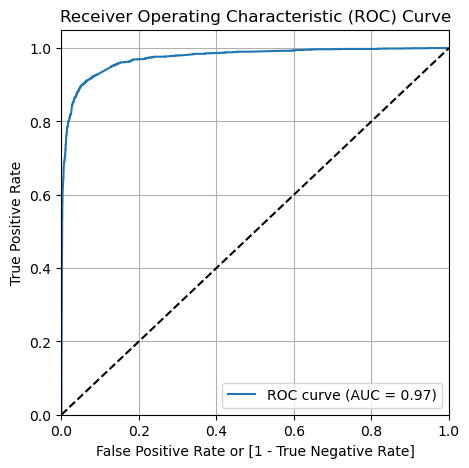

In [173]:
plot_roc_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

#### Optimal Cutoff Point

In [174]:
# Define probability cutoffs
cutoffs = [float(x) / 10 for x in range(10)]

# Create columns with different probability cutoffs
for cutoff in cutoffs:
    column_name = f'Predicted_{int(cutoff * 10)}'
    y_train_pred_final[column_name] = y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > cutoff else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,Predicted_0,Predicted_1,Predicted_2,Predicted_3,Predicted_4,Predicted_5,Predicted_6,Predicted_7,Predicted_8,Predicted_9
0,0,0.416167,7962,0,1,1,1,1,1,0,0,0,0,0
1,0,0.090235,5520,0,1,0,0,0,0,0,0,0,0,0
2,0,0.004616,1962,0,1,0,0,0,0,0,0,0,0,0
3,1,0.993766,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.038363,9170,0,1,0,0,0,0,0,0,0,0,0


In [175]:
# Create an empty DataFrame to store results
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])

# Iterate over different probability cutoffs
for cutoff in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    # Create confusion matrix for the current cutoff
    cm = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[f'Predicted_{int(cutoff * 10)}'])
    
    # Calculate metrics
    total = sum(sum(cm))
    accuracy = (cm[0, 0] + cm[1, 1]) / total
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    
    # Append results to the DataFrame
    cutoff_df = cutoff_df.append({'prob': cutoff, 'accuracy': accuracy, 'sensitivity': sensitivity, 'specificity': specificity}, ignore_index=True)

print(cutoff_df)

   prob  accuracy  sensitivity  specificity
0   0.0  0.379630     1.000000     0.000000
1   0.1  0.849969     0.973543     0.774349
2   0.2  0.897677     0.952460     0.864154
3   0.3  0.921061     0.916908     0.923602
4   0.4  0.927652     0.899959     0.944599
5   0.5  0.928594     0.880943     0.957754
6   0.6  0.926083     0.857792     0.967873
7   0.7  0.914783     0.810666     0.978497
8   0.8  0.907250     0.779661     0.985328
9   0.9  0.887006     0.719305     0.989628


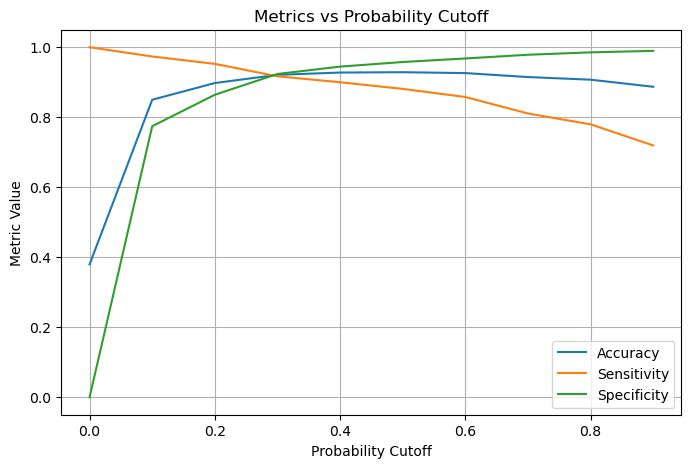

In [176]:
# Plot the metrics for different probability cutoffs
plt.figure(figsize=(8, 5))
plt.plot(cutoff_df['prob'], cutoff_df['accuracy'], label='Accuracy')
plt.plot(cutoff_df['prob'], cutoff_df['sensitivity'], label='Sensitivity')
plt.plot(cutoff_df['prob'], cutoff_df['specificity'], label='Specificity')

# Add labels and title
plt.xlabel('Probability Cutoff')
plt.ylabel('Metric Value')
plt.title('Metrics vs Probability Cutoff')
plt.legend()
plt.grid(True)
plt.show()

In [177]:
# Assign final predicted values based on the chosen cutoff
y_train_pred_final['final_Predicted'] = y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.3 else 0)

# Display the updated DataFrame
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,Predicted_0,Predicted_1,Predicted_2,Predicted_3,Predicted_4,Predicted_5,Predicted_6,Predicted_7,Predicted_8,Predicted_9,final_Predicted
0,0,0.416167,7962,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.090235,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.004616,1962,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.993766,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.038363,9170,0,1,0,0,0,0,0,0,0,0,0,0


In [178]:
# Assign lead scores based on the predicted probability
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_prob'].map(lambda x: round(x * 100))

# Display selected columns in the DataFrame
y_train_pred_final[['Converted', 'Converted_prob', 'Prospect ID', 'final_Predicted', 'Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.416167,7962,1,42
1,0,0.090235,5520,0,9
2,0,0.004616,1962,0,0
3,1,0.993766,1566,1,99
4,0,0.038363,9170,0,4


In [179]:
confusion2 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3651,  302],
       [ 201, 2218]], dtype=int64)

In [180]:
# Let's check the overall accuracy.
accuracy = accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['final_Predicted'])
print("Overall Accuracy:", accuracy)

Overall Accuracy: 0.9210608913998745


In [181]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [182]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9169078131459281

In [183]:
# Let us calculate specificity
TN / float(TN+FP)

0.9236023273463192

In [184]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.07639767265368075


In [185]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8801587301587301


In [186]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9478193146417445


In [187]:
#Looking at the confusion matrix again

confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3651,  302],
       [ 201, 2218]], dtype=int64)

In [188]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8801587301587301

In [189]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9169078131459281

In [190]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8801587301587301

In [191]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9169078131459281

In [192]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

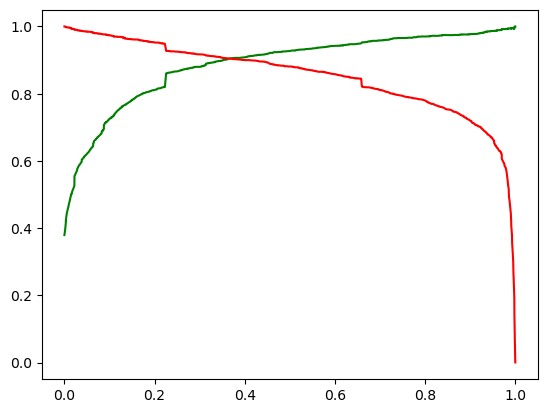

In [193]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### TEST set

In [194]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']



# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(df_train[num_vars])

# Transform both training and test data using the fitted scaler

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [195]:
# Separate the target variable 'Converted' from the features
y_test = df_test.pop('Converted')

# Drop the 'Lead Number' column from the features and assign the result to X_train
X_test = df_test.drop('Lead Number', axis=1)

In [196]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Page Views Per Visit,Do Not Email,TotalVisits,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,...,Specialization_Marketing Management,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified
3504,4.240000e+02,3.000000e+00,0,3.000000e+00,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4050,-2.062938e-17,4.794937e-17,0,2.341713e-17,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7201,7.120000e+02,2.000000e+00,1,2.000000e+00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1196,4.230000e+02,4.000000e+00,0,4.000000e+00,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8219,2.470000e+02,1.750000e+00,0,7.000000e+00,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [197]:
X_test_sm = sm.add_constant(X_test)

In [198]:
X_test_sm.shape

(2731, 22)

In [199]:
y_test_pred = res.predict(X_test_sm)

In [200]:
y_test_pred[:10]

3504    1.000000
4050    0.999115
7201    1.000000
1196    1.000000
8219    1.000000
8747    0.417461
9048    1.000000
6524    1.000000
7693    1.000000
8187    0.266513
dtype: float64

In [201]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3504,1.000000
4050,0.999115
7201,1.000000
1196,1.000000
8219,1.000000


In [202]:
y_test = pd.DataFrame(y_test)
y_test

,Converted
3504,0
4050,1
7201,0
1196,0
8219,1
...,...
6508,0
315,0
3766,0
8043,1


In [203]:
y_test['Prospect ID'] = y_test.index

In [204]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [205]:
# Appending y_test and y_pred_1
y_pred_final = pd.concat([y_test, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,1.000000
1,1,4050,0.999115
2,0,7201,1.000000
3,0,1196,1.000000
4,1,8219,1.000000


In [206]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,1.000000
1,1,4050,0.999115
2,0,7201,1.000000
3,0,1196,1.000000
4,1,8219,1.000000


In [207]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [208]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504,0,1.000000,100
1,4050,1,0.999115,100
2,7201,0,1.000000,100
3,1196,0,1.000000,100
4,8219,1,1.000000,100


In [209]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [210]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3504,0,1.000000,100,1
1,4050,1,0.999115,100,1
2,7201,0,1.000000,100,1
3,1196,0,1.000000,100,1
4,8219,1,1.000000,100,1


In [211]:
accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.49432442328817283

In [212]:
confusion3 = confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion3

array([[ 314, 1375],
       [   6, 1036]], dtype=int64)

In [213]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [214]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9942418426103646

In [215]:
# Let us calculate specificity
TN / float(TN+FP)

0.18590882178804027

In [216]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.4296972210700954

In [217]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9942418426103646